In [1]:
import pandas as pd
import seaborn as sns 
import re 
import numpy as np
import matplotlib.pyplot as plt

https://www.tn.gov/education/districts/federal-programs-and-oversight/data/data-downloads.html

                                                                     EDA

In [2]:
R  = pd.read_csv('../data/reportcarddata2020.csv')
R.head()

,district_number,district_name,school_number,school_name,subgroup,valid_tests,participation_rate,average_english_score,average_math_score,average_reading_score,average_science_score,average_composite_score,number_scoring_21_or_higher,percent_scoring_21_or_higher,number_scoring_below_19,percent_scoring_below_19
0,10,Anderson County,2,Anderson County High School,All Students,269,100,19.8,19.4,20.7,20.1,20.1,115,42.8,115,42.8
1,10,Anderson County,2,Anderson County High School,Black/Hispanic/Native American,4,*,*,*,*,*,*,*,*,*,*
2,10,Anderson County,2,Anderson County High School,Economically Disadvantaged,72,100,17.5,17.5,19.1,18.5,18.3,18,25,42,58.3
3,10,Anderson County,2,Anderson County High School,Students with Disabilities,32,100,12.5,15.2,14.4,14.8,14.4,**,**,**,**
4,10,Anderson County,25,Clinton High School,All Students,258,100,18.3,18,19.1,19.1,18.8,83,32.2,139,53.9


In [3]:
R_20=R.drop(columns=['valid_tests','participation_rate','number_scoring_21_or_higher','percent_scoring_21_or_higher',
                     'number_scoring_below_19','percent_scoring_below_19'])
R_20.head(2)

,district_number,district_name,school_number,school_name,subgroup,average_english_score,average_math_score,average_reading_score,average_science_score,average_composite_score
0,10,Anderson County,2,Anderson County High School,All Students,19.8,19.4,20.7,20.1,20.1
1,10,Anderson County,2,Anderson County High School,Black/Hispanic/Native American,*,*,*,*,*


In [4]:
R_20['year']=2020

In [5]:
R_20.columns

Index(['district_number', 'district_name', 'school_number', 'school_name',
       'subgroup', 'average_english_score', 'average_math_score',
       'average_reading_score', 'average_science_score',
       'average_composite_score', 'year'],
      dtype='object')

In [6]:
R_20.shape

(1689, 11)

In [7]:
R_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   district_number          1689 non-null   int64 
 1   district_name            1689 non-null   object
 2   school_number            1689 non-null   int64 
 3   school_name              1689 non-null   object
 4   subgroup                 1689 non-null   object
 5   average_english_score    1676 non-null   object
 6   average_math_score       1676 non-null   object
 7   average_reading_score    1676 non-null   object
 8   average_science_score    1676 non-null   object
 9   average_composite_score  1676 non-null   object
 10  year                     1689 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 145.3+ KB


                                                              Cleaning Data

What does "*" mean? 

Values that are labeled with a * have been suppressed to protect the identities of our TN students. Our suppression rules can be found on our Report Card web page here: https://www.tn.gov/content/dam/tn/education/rpt-crd/SuppressionRules201819.pdf

For any metric where the student count for the specific school, district, or state is less than
10 valid students or tests, the metric will be suppressed. This will be denoted as “*”.

In [8]:
R_20['average_math_score'] = R_20['average_math_score'].str.replace('*', '', regex=False)

In [9]:
R_20['average_english_score'] = R_20['average_english_score'].str.replace('*', '', regex=False)

In [10]:
R_20['average_reading_score'] = R_20['average_reading_score'].str.replace('*', '', regex=False)

In [11]:
R_20['average_science_score'] = R_20['average_science_score'].str.replace('*', '', regex=False)

In [12]:
R_20['average_composite_score'] = R_20['average_composite_score'].str.replace('*', '', regex=False)

In [13]:
R_20.head(1)

,district_number,district_name,school_number,school_name,subgroup,average_english_score,average_math_score,average_reading_score,average_science_score,average_composite_score,year
0,10,Anderson County,2,Anderson County High School,All Students,19.8,19.4,20.7,20.1,20.1,2020


                                                     How many school districts are there in Tennessee ?
                                                      # choloropeth,how the schools  are  distributed

In [14]:
R = R_20.district_name.value_counts().reset_index() 
R 

,district_name,count
0,Shelby County,188
1,Davidson County,131
2,Hamilton County,102
3,Knox County,81
4,Sumner County,49
...,...,...
124,Huntingdon Special School District,4
125,Union City,4
126,Hancock County,3
127,Alvin C York Institute,3


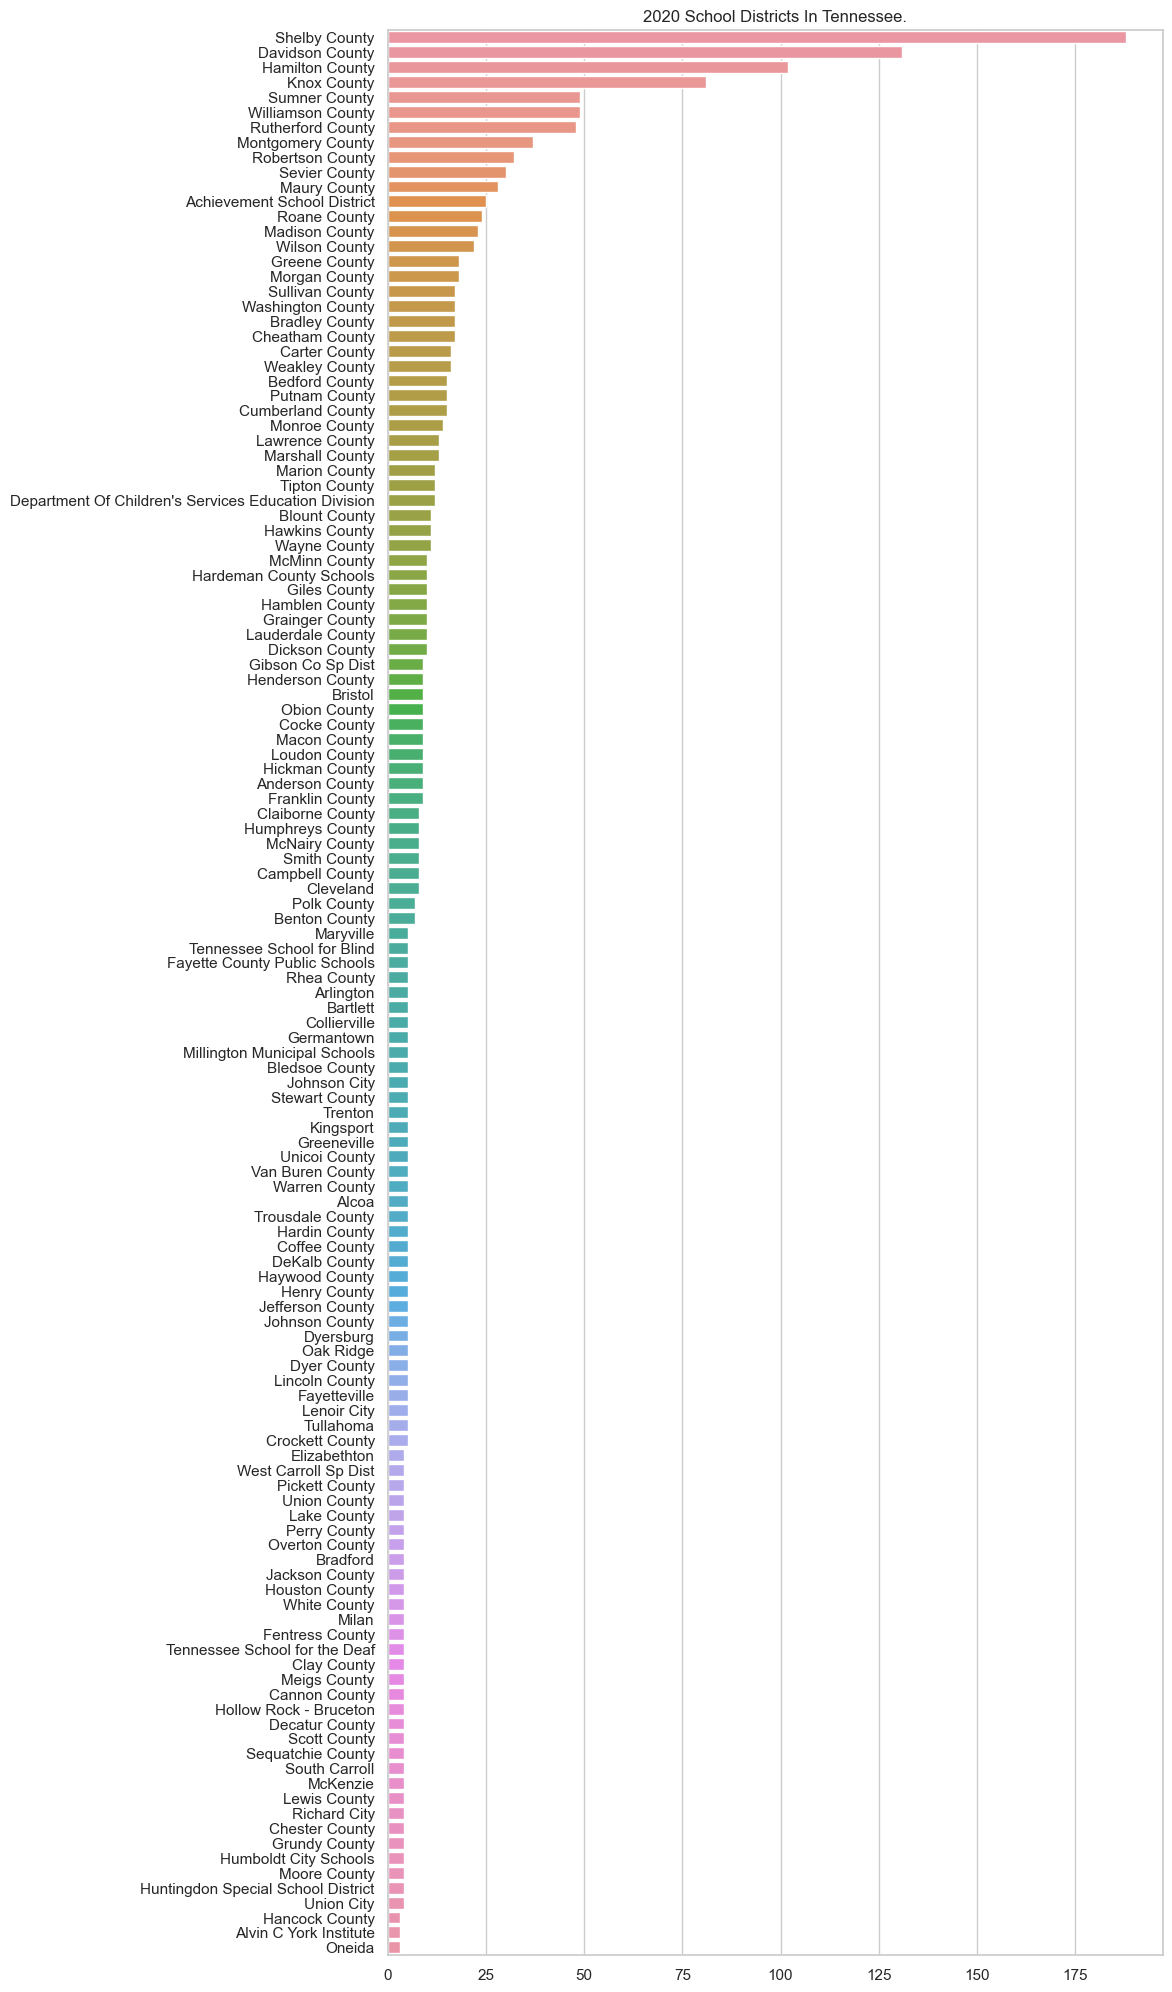

In [15]:
plt.figure(figsize = (10, 25))                               # Increase the plot size to 10 x 6
sns.set(style="whitegrid")                                  # Change the plot style
sns.barplot(x = 'count', 
            y = 'district_name', 
            data = R)
plt.xlabel('')                                              # Remove the x-axis label
plt.ylabel('')                                              # Remove the y-axis label
plt.title('2020 School Districts In Tennessee.');

                                          How many schools are there in each school district ?

                                          

In [16]:
R_20.school_name.value_counts()

school_name
Central High School                    28
Sequoyah High School                   10
Halls High School                      10
Middle College High                     9
Tyner Academy                           5
                                       ..
Bradley County Virtual School           2
Riverside Academy                       2
Grainger Academy                        2
Clinch School                           2
Samuel Everett School of Innovation     1
Name: count, Length: 369, dtype: int64

In [17]:
schools = R_20.district_name.value_counts().reset_index().sort_values('count',ascending=False).head(10)
schools

,district_name,count
0,Shelby County,188
1,Davidson County,131
2,Hamilton County,102
3,Knox County,81
4,Sumner County,49
5,Williamson County,49
6,Rutherford County,48
7,Montgomery County,37
8,Robertson County,32
9,Sevier County,30


In [18]:
school_counts = R_20.groupby('district_name')['school_name'].count().reset_index(name='Number_of_Schools').sort_values('Number_of_Schools',ascending=False).head(10) 
school_counts



,district_name,Number_of_Schools
105,Shelby County,188
26,Davidson County,131
46,Hamilton County,102
65,Knox County,81
127,Williamson County,49
110,Sumner County,49
101,Rutherford County,48
86,Montgomery County,37
100,Robertson County,32
104,Sevier County,30


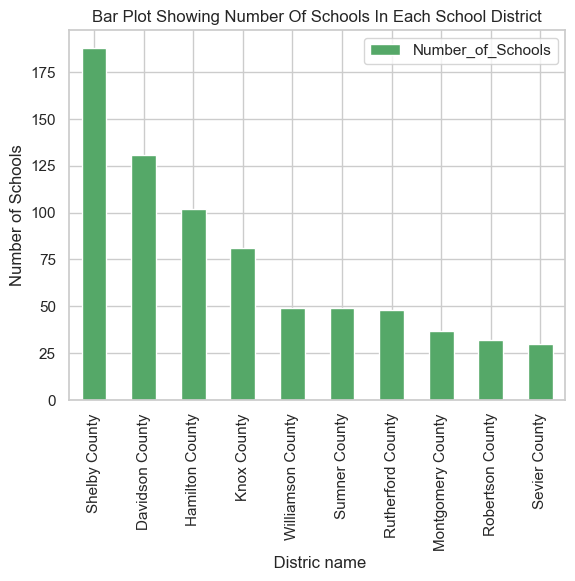

In [19]:
school_counts.plot.bar(x= 'district_name',y='Number_of_Schools',color='g')
plt.title('Bar Plot Showing Number Of Schools In Each School District')
plt.xlabel(' Distric name')
plt.ylabel('Number of Schools');

In [20]:
Highest_num_Sch_districts = school_counts.sort_values('Number_of_Schools',ascending=False).head(5)   # Highest 'Number_of_Schools' in  School_district(district_name)
Highest_num_Sch_districts

,district_name,Number_of_Schools
105,Shelby County,188
26,Davidson County,131
46,Hamilton County,102
65,Knox County,81
127,Williamson County,49


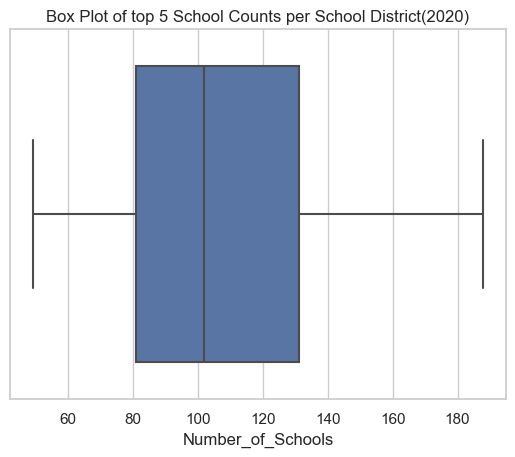

In [21]:
sns.boxplot(x='Number_of_Schools', data=Highest_num_Sch_districts)
plt.xlabel('Number_of_Schools')
plt.title('Box Plot of top 5 School Counts per School District(2020)');

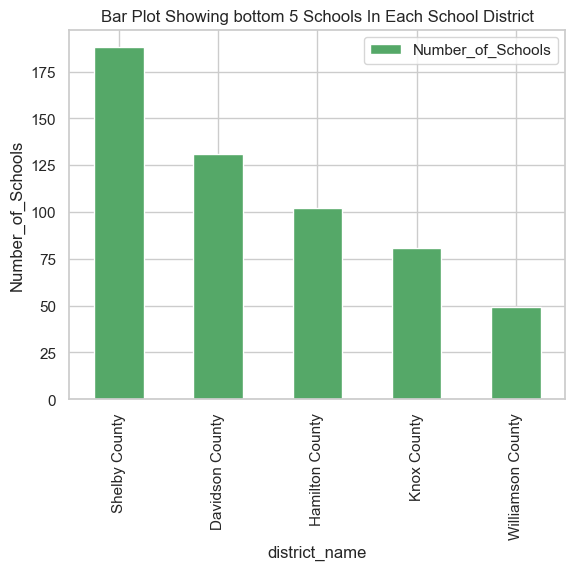

In [22]:
Highest_num_Sch_districts.plot.bar(x= 'district_name',y='Number_of_Schools', color='g')
plt.title('Bar Plot Showing bottom 5 Schools In Each School District')
plt.ylabel('Number_of_Schools');

In [23]:
num_Sch_districts = school_counts.sort_values('Number_of_Schools',ascending=False).tail(5)  
num_Sch_districts

,district_name,Number_of_Schools
110,Sumner County,49
101,Rutherford County,48
86,Montgomery County,37
100,Robertson County,32
104,Sevier County,30


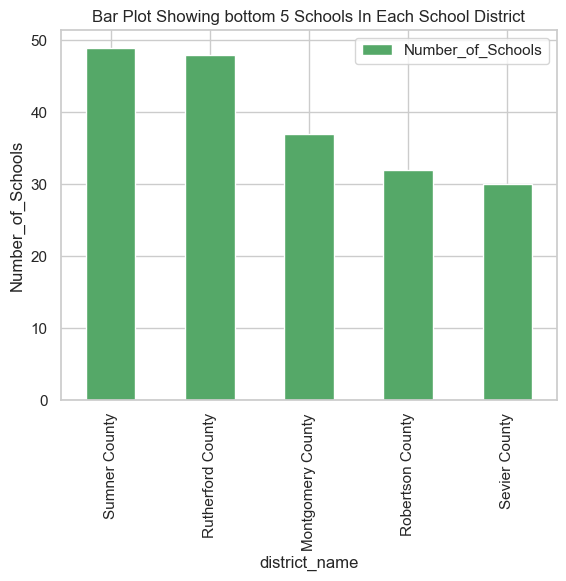

In [24]:
num_Sch_districts.plot.bar(x= 'district_name',y='Number_of_Schools', color='g')
plt.title('Bar Plot Showing bottom 5 Schools In Each School District')
plt.ylabel('Number_of_Schools');

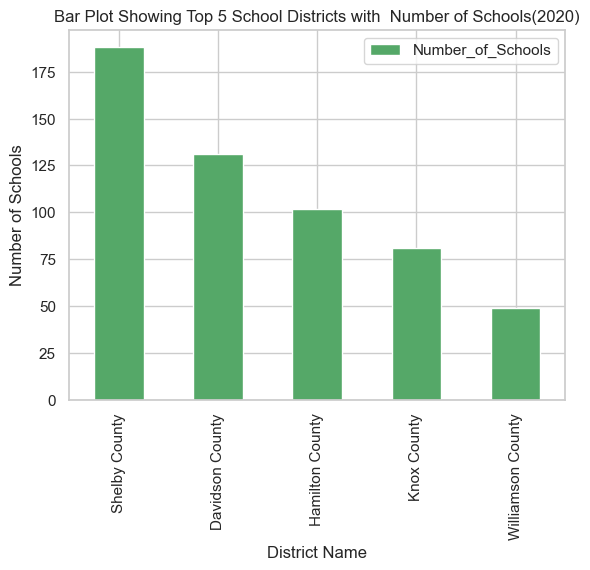

In [25]:
Highest_num_Sch_districts.plot.bar(x= 'district_name',y='Number_of_Schools', color='g')
plt.title('Bar Plot Showing Top 5 School Districts with  Number of Schools(2020)')
plt.xlabel('District Name' )
plt.ylabel('Number of Schools');

                                    Describe each subject avg scores , for each school across all districts?

                                                 average_math_score

In [26]:
R_20.dtypes

district_number             int64
district_name              object
school_number               int64
school_name                object
subgroup                   object
average_english_score      object
average_math_score         object
average_reading_score      object
average_science_score      object
average_composite_score    object
year                        int64
dtype: object

In [27]:
R_20['average_math_score'] = pd.to_numeric(R_20['average_math_score'])  #converting datatype

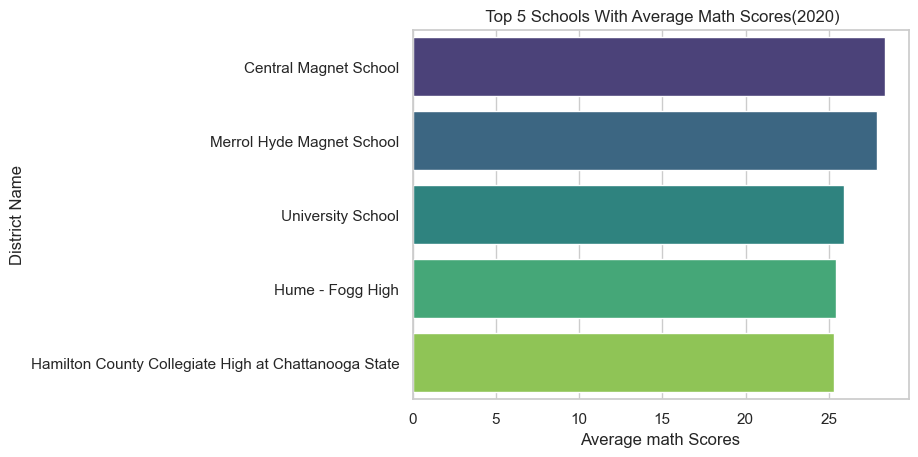

In [28]:

district_performance = R_20.groupby('school_name')['average_math_score'].mean().reset_index().sort_values('average_math_score',ascending=False).head(5)
sns.barplot(y='school_name', x='average_math_score', data=district_performance,palette='viridis')
plt.xlabel('Average math Scores')
plt.ylabel('District Name')
plt.title(' Top 5 Schools With Average Math Scores(2020)');


In [29]:
district_performance.to_csv('../district_performance.csv',index=False)

In [30]:
central_magnet_data = R_20[R_20['school_name'] == 'Central Magnet School']

C:\Users\TitanUp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\TitanUp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


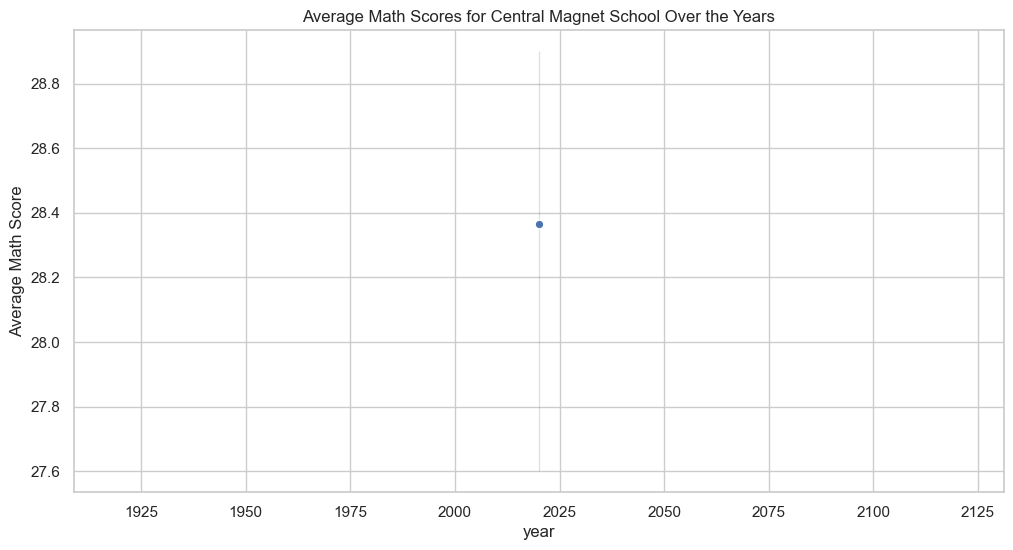

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=central_magnet_data, x='year', y='average_math_score', marker='o', linestyle='-', color='b')
plt.title('Average Math Scores for Central Magnet School Over the Years')
plt.xlabel('year')
plt.ylabel('Average Math Score');

In [32]:
School_Math_outliers =  R_20[['school_name','average_math_score']]
School_Math_outliers.describe()

,average_math_score
count,1258.000000
mean,17.540143
std,2.153638
min,13.600000
25%,15.900000
50%,17.300000
75%,18.600000
max,28.900000


In [33]:
Math_outliers = R_20.average_math_score.describe().reset_index()
Math_outliers 

,index,average_math_score
0,count,1258.000000
1,mean,17.540143
2,std,2.153638
3,min,13.600000
4,25%,15.900000
5,50%,17.300000
6,75%,18.600000
7,max,28.900000


In [34]:
IQR = 2.7
low_outliers = 1-(1.5 * 2.7)
print(low_outliers)
high_outliers = 10 + (1.5 * 2.7)
print(high_outliers)

-3.0500000000000007
14.05


2


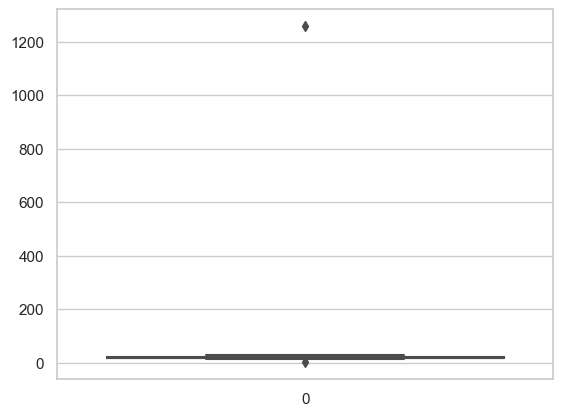

In [35]:
print(len(Math_outliers.loc[(Math_outliers.average_math_score < -12.5) | (Math_outliers.average_math_score > 23.5)]))
sns.boxplot(Math_outliers.average_math_score);

In [36]:
Math_outliers.corr(numeric_only = True)

,average_math_score
average_math_score,1.0


In [37]:

# For example, checking outlier schools
outlier_schools = School_Math_outliers['school_name'].unique()
print("Schools with outlier math scores:", outlier_schools)

Schools with outlier math scores: ['Anderson County High School' 'Clinton High School'
 'Oak Ridge High School' 'Cascade High School'
 'Shelbyville Central High School' 'Community High School'
 'Big Sandy School' 'Camden Central High School'
 'Bledsoe County High School' 'Heritage High School'
 'Samuel Everett School of Innovation' 'William Blount High School'
 'Alcoa High School' 'Maryville High School' 'Bradley Central High School'
 'North Cleveland GOAL Academy' 'Walker Valley High School'
 'Bradley County Virtual School' 'Cleveland High'
 'F.I. Denning Center of Technology and Careers'
 'Campbell County Comprehensive High School' 'Jellico High School'
 'Cannon County High School' 'Central High School'
 'Huntingdon High School' 'McKenzie High School' 'Clarksburg School'
 'West Carroll Junior/Senior High School' 'Cloudland High School'
 'Hampton High School' 'Happy Valley High School' 'Unaka High School'
 'Elizabethton High School' 'Cheatham Co Central' 'Harpeth High School'
 'Sycamo

                                                        average_english_score
     

In [38]:
R_20['average_english_score'] = pd.to_numeric(R_20['average_english_score'])

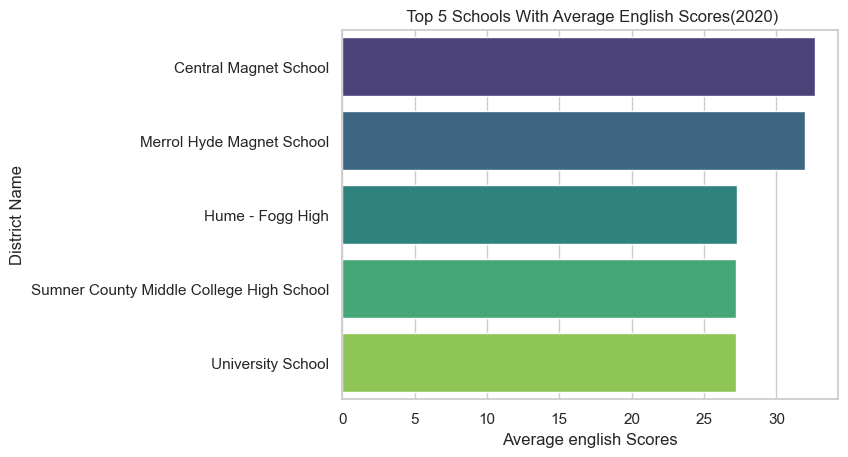

In [39]:

district_e_performance = R_20.groupby('school_name')['average_english_score'].mean().reset_index().sort_values('average_english_score',ascending=False).head(5)
sns.barplot(y='school_name', x='average_english_score', data=district_e_performance,palette='viridis')
plt.xlabel('Average english Scores')
plt.ylabel('District Name')
plt.title(' Top 5 Schools With Average English Scores(2020)');


                                                average_reading_score



In [40]:
R_20['average_reading_score'] = pd.to_numeric(R_20['average_reading_score']) # Con Datatype

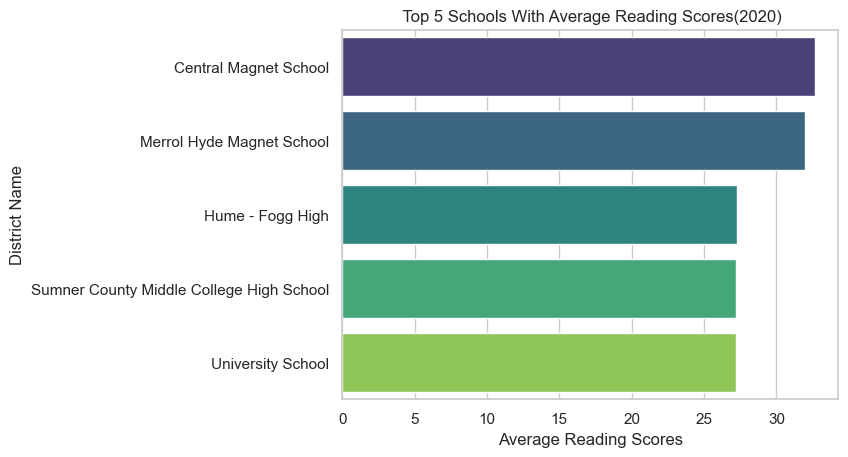

In [41]:

district_r_performance = R_20.groupby('school_name')['average_reading_score'].mean().reset_index().sort_values('average_reading_score',ascending=False).head(5)
sns.barplot(y='school_name', x='average_english_score', data=district_e_performance,palette='viridis')
plt.xlabel('Average Reading Scores')
plt.ylabel('District Name')
plt.title(' Top 5 Schools With Average Reading Scores(2020)');


                                                               average_science_score 

In [42]:
R_20['average_science_score'] = pd.to_numeric(R_20['average_science_score']) 

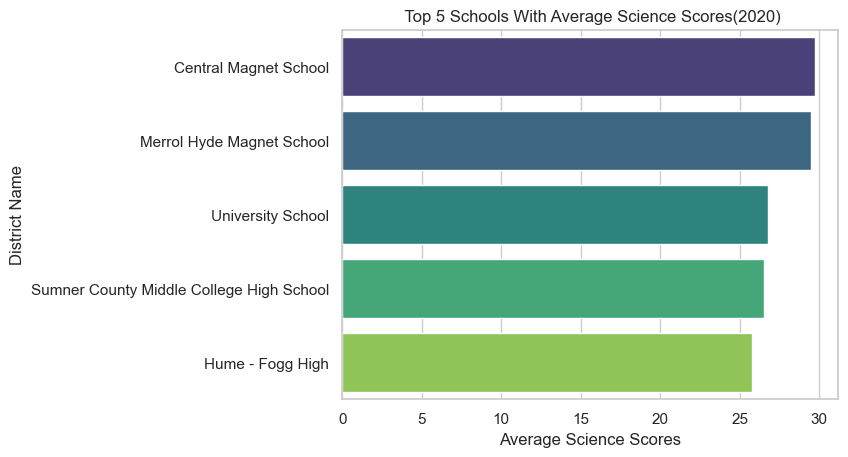

In [43]:

district_s_performance = R_20.groupby('school_name')['average_science_score'].mean().reset_index().sort_values('average_science_score',ascending=False).head(5)
sns.barplot(y='school_name', x='average_science_score', data=district_s_performance,palette='viridis')
plt.xlabel('Average Science Scores')
plt.ylabel('District Name')
plt.title(' Top 5 Schools With Average Science Scores(2020)');

In [44]:

# Calculate average scores for each subject
subject_scores = R_20.groupby('school_name')[['average_math_score', 'average_science_score', 'average_reading_score', 'average_english_score']].mean().reset_index().head(10)

# Melt the DataFrame to long format for seabornh
df_melted = subject_scores.melt(id_vars='school_name', 
                                value_vars=['average_math_score', 'average_science_score', 'average_reading_score', 'average_english_score'],
                                var_name='Subject', 
                                value_name='Average_Score')




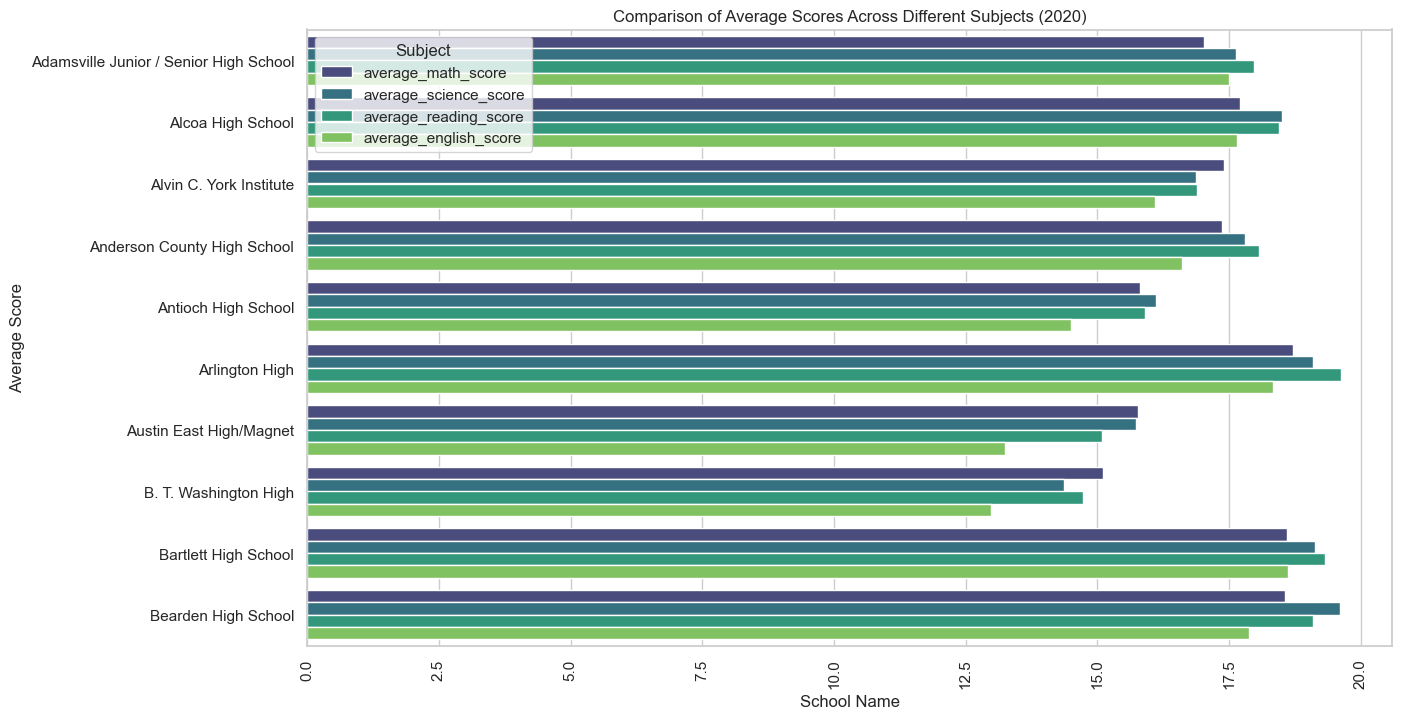

In [45]:
# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(y='school_name', x='Average_Score', hue='Subject', data=df_melted, palette='viridis')

# Adding labels and title
plt.xlabel('School Name')
plt.ylabel('Average Score')
plt.title('Comparison of Average Scores Across Different Subjects (2020)')
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Display the plot
plt.legend(title='Subject',loc = 'upper left')
plt.show()

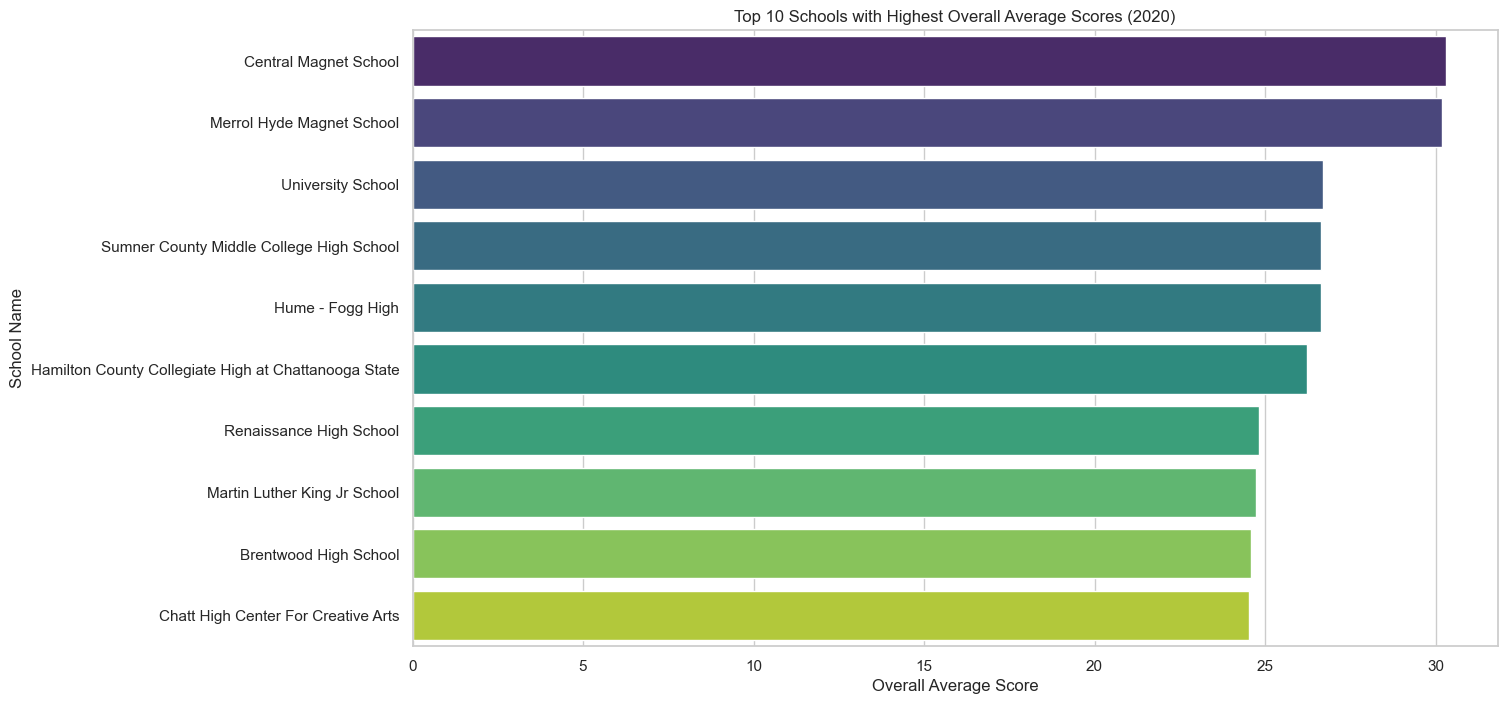

In [46]:

# Calculate average scores for each subject
subject_scores = R_20.groupby('school_name')[['average_math_score', 'average_science_score', 'average_reading_score', 'average_english_score']].mean().reset_index()

# Calculate the overall average score across all subjects for each school
subject_scores['overall_average_score'] = subject_scores[['average_math_score', 'average_science_score', 'average_reading_score', 'average_english_score']].mean(axis=1)

# Sort schools by the overall average score in descending order and select top 10
top_schools = subject_scores.sort_values(by='overall_average_score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='overall_average_score', y='school_name', data=top_schools, palette='viridis')

# Adding labels and title
plt.xlabel('Overall Average Score')
plt.ylabel('School Name')
plt.title('Top 10 Schools with Highest Overall Average Scores (2020)')

# Display the plot
plt.show()


In [47]:
subject_stats = R_20[['average_english_score','average_math_score', 'average_reading_score','average_science_score' ]].describe()
subject_stats

,average_english_score,average_math_score,average_reading_score,average_science_score
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,16.737599,17.540143,18.017965,17.876868
std,3.353559,2.153638,3.037298,2.512875
min,8.500000,13.600000,11.300000,11.500000
25%,14.200000,15.900000,15.800000,16.000000
50%,16.600000,17.300000,17.900000,17.700000
75%,18.600000,18.600000,19.700000,19.300000
max,33.400000,28.900000,31.500000,30.200000


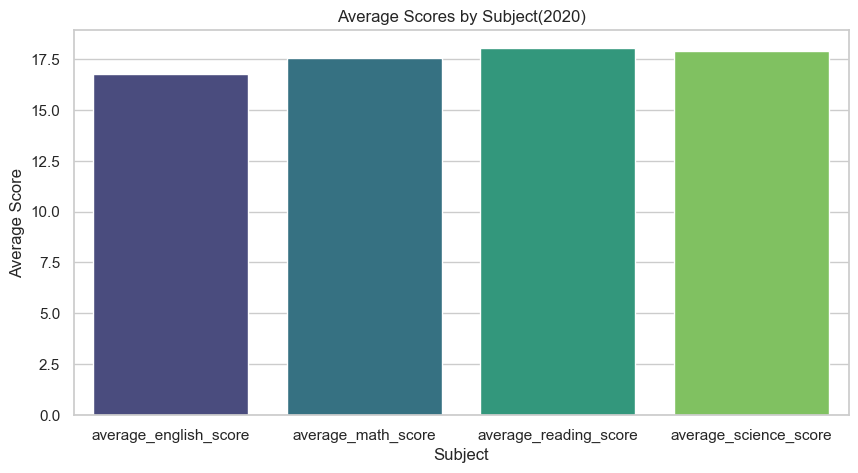

In [48]:
plt.figure(figsize=(10, 5))
sns.barplot(x=subject_stats.columns, y=subject_stats.loc['mean'], palette='viridis')
plt.title('Average Scores by Subject(2020)')
plt.xlabel('Subject')
plt.ylabel('Average Score');


What percentage of schools eng_avg scores were statistical outliers for that year ?

In [49]:
R_20.average_math_score.value_counts().reset_index().head(1)

,average_math_score,count
0,18.4,31


In [50]:
df_2020 =R_20.loc[R_20.average_math_score.isin(R_20.average_math_score.value_counts().reset_index().head(1)['average_math_score'])]

In [51]:
df_2020.describe()

,district_number,school_number,average_english_score,average_math_score,average_reading_score,average_science_score,year
count,31.000000,31.000000,31.000000,3.100000e+01,31.000000,31.000000,31.0
mean,593.419355,1364.645161,18.209677,1.840000e+01,19.583871,18.993548,2020.0
std,270.188178,3007.428620,1.098895,1.083432e-14,1.018855,0.586478,0.0
min,92.000000,10.000000,15.800000,1.840000e+01,17.900000,17.600000,2020.0
25%,345.000000,20.000000,17.500000,1.840000e+01,18.800000,18.550000,2020.0
50%,700.000000,50.000000,18.300000,1.840000e+01,19.400000,19.000000,2020.0
75%,796.000000,109.500000,18.900000,1.840000e+01,20.100000,19.400000,2020.0
max,950.000000,8265.000000,21.600000,1.840000e+01,22.900000,20.300000,2020.0


df_2020['average_math_score'] = df_2020['average_math_score'].map('{:.2f}'.format)

In [52]:
df_2020.describe()

,district_number,school_number,average_english_score,average_math_score,average_reading_score,average_science_score,year
count,31.000000,31.000000,31.000000,3.100000e+01,31.000000,31.000000,31.0
mean,593.419355,1364.645161,18.209677,1.840000e+01,19.583871,18.993548,2020.0
std,270.188178,3007.428620,1.098895,1.083432e-14,1.018855,0.586478,0.0
min,92.000000,10.000000,15.800000,1.840000e+01,17.900000,17.600000,2020.0
25%,345.000000,20.000000,17.500000,1.840000e+01,18.800000,18.550000,2020.0
50%,700.000000,50.000000,18.300000,1.840000e+01,19.400000,19.000000,2020.0
75%,796.000000,109.500000,18.900000,1.840000e+01,20.100000,19.400000,2020.0
max,950.000000,8265.000000,21.600000,1.840000e+01,22.900000,20.300000,2020.0


R_20['average_math_score'] = R_20['average_math_score'].map('{:.2f}'.format)

R_20.head(1)

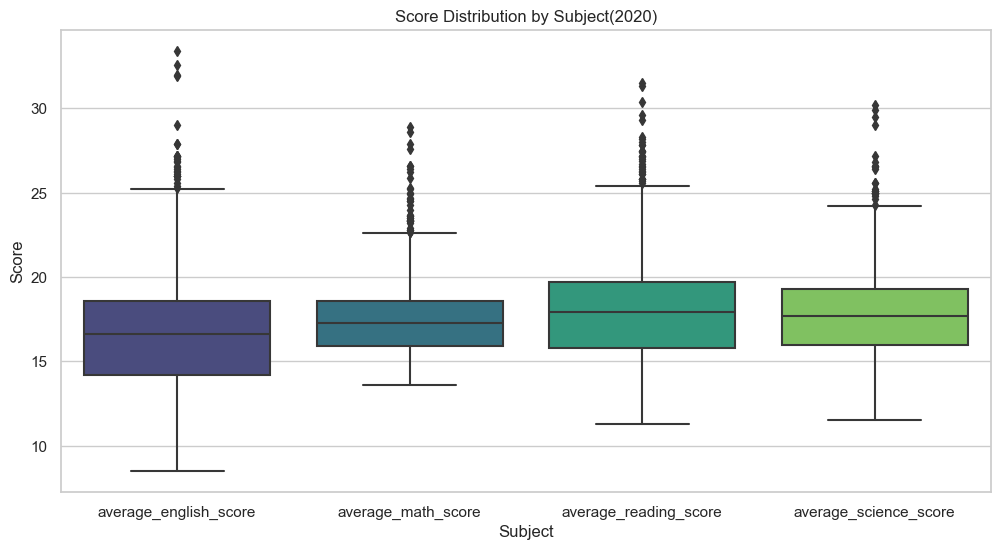

In [53]:
df_melted = R_20.melt(value_vars=['average_english_score','average_math_score', 'average_reading_score','average_science_score' ],
                    var_name='Subject', value_name='Score')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Subject', y='Score', data=df_melted, palette='viridis')
plt.title('Score Distribution by Subject(2020)');

In [54]:
 IQR = df_2020.describe().loc['75%','average_english_score']- df_2020.describe().loc['25%','average_english_score']
IQR

1.3999999999999986

In [55]:
low_outliers = df_2020.describe().loc['25%','average_english_score']-(IQR * 1.5)
low_outliers

15.400000000000002

In [56]:
high_outliers = df_2020.describe().loc['75%','average_english_score']+ (IQR * 1.5)
high_outliers


20.999999999999996

In [57]:
df_2020.loc[(df_2020.average_english_score <= low_outliers) |(df_2020.average_english_score >= high_outliers)]

,district_number,district_name,school_number,school_name,subgroup,average_english_score,average_math_score,average_reading_score,average_science_score,average_composite_score,year
286,190,Davidson County,512,Nashville School Of The Arts,Black/Hispanic/Native American,21.6,18.4,22.9,20.3,21,2020


In [58]:
len(df_2020.loc[(df_2020.average_english_score <= low_outliers) |(df_2020.average_english_score >= high_outliers)])/len(df_2020)*100

3.225806451612903

3.22 % of english scores are statistical outliers of that year 

                                 for all scores (what per of school scores are statistical outliers of 2020 school yers ?)

In [59]:
df_melted = R_20.melt(value_vars=['average_math_score','average_science_score', 'average_reading_score', 'average_english_score']).describe()
df_melted 

,value
count,5032.000000
mean,17.543144
std,2.845674
min,8.500000
25%,15.600000
50%,17.400000
75%,19.100000
max,33.400000


In [60]:
# IQR = 3.5
low_outliers = 1-(1.5 * 3.5)
print(low_outliers)
high_outliers = 10 + (1.5 * 3.5)
print(high_outliers)

-4.25
15.25


2


C:\Users\TitanUp\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


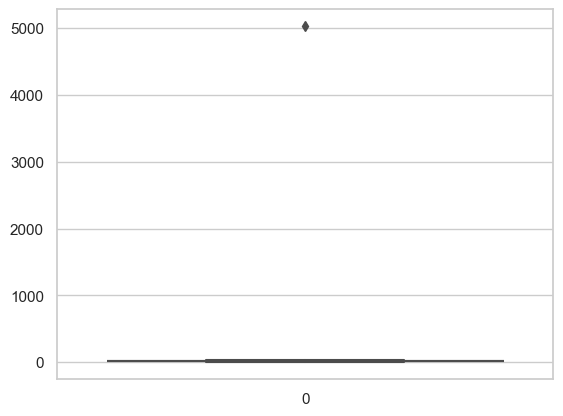

In [61]:
print(len(df_melted .loc[(df_melted.value < -12.5) | (df_melted .value > 23.5)]))
sns.boxplot(df_melted .value);

In [62]:
df_melted.corr(numeric_only = True)

,value
value,1.0


In [63]:
subgroups_20 = R_20.groupby(['subgroup'])['school_name'].size()
subgroups_20

subgroup
All Students                      377
Black/Hispanic/Native American    356
Economically Disadvantaged        374
English Learners                  221
Students with Disabilities        361
Name: school_name, dtype: int64

In [64]:
Total_students = R_20.subgroup.count()

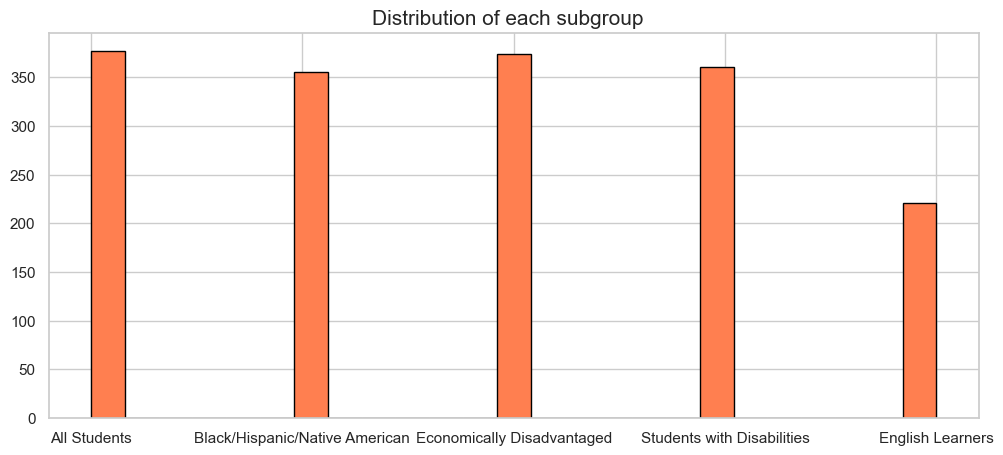

In [65]:
R_20['subgroup'].hist(bins = 25, color = 'coral', edgecolor = 'black', figsize = (12,5))

plt.title('Distribution of each subgroup  ', fontsize = 15);

                                                            average_composite_score
                                                         # ACT Test Score Ranges
Understanding ACT score ranges and what they mean is crucial in evaluating your performance and determining where you stand in comparison to other test-takers.   Each section has a test score range of 1-36:  

Below Average Score Range: 1-16
Average Score Range: 17-24
Above Average Score Range: 2 5-36


In [66]:
R_20['average_composite_score'] = pd.to_numeric(R_20['average_composite_score']) 

In [67]:
Composite = R_20.groupby('school_name')['average_composite_score'].mean().reset_index(name='Avg composite Score For Schools') 

In [68]:
Composite_scores   = Composite.sort_values('Avg composite Score For Schools',ascending=False).head(7)
Composite_scores  
                                    # Act Above Average Score Range For the Schools(25-36), Top 7 schools with Above Average Score Ranges (25-36)


,school_name,Avg composite Score For Schools
31,Central Magnet School,30.5
207,Merrol Hyde Magnet School,30.3
341,University School,26.9
315,Sumner County Middle College High School,26.8
149,Hume - Fogg High,26.8
123,Hamilton County Collegiate High at Chattanooga...,26.3
261,Renaissance High School,25.0


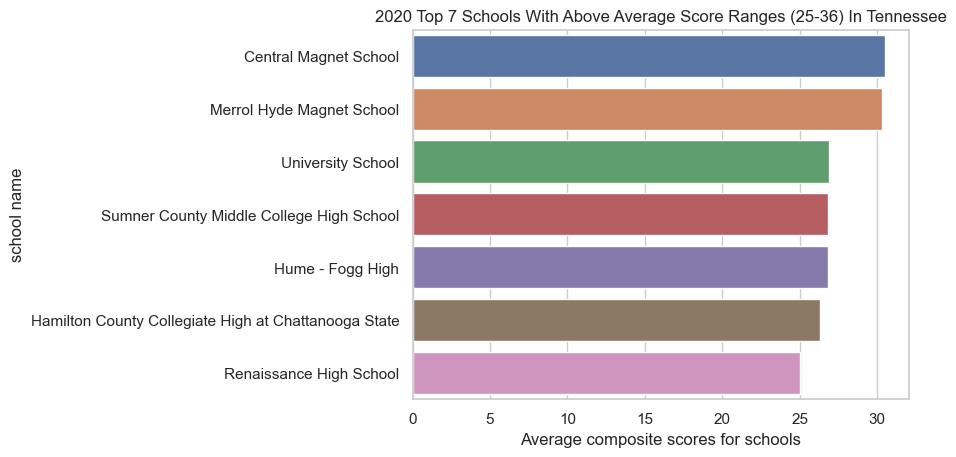

In [69]:
sns.barplot(data = Composite_scores,  x ='Avg composite Score For Schools', y = 'school_name')
plt.xlabel('Average composite scores for schools' )
plt.ylabel( 'school name' )
plt.title('2020 Top 7 Schools With Above Average Score Ranges (25-36) In Tennessee');

4a.Is there a corelation between scores in math & science subjects ? do  All Students perform well in math also perform well in science ?

5.Is there a corelation between scores in all subjects ? do  All Students perform well in math, science,english  also perform well in reading ?



In [193]:
All_students = R_20.loc[R_20.subgroup == 'All Students']
All_students.head()

,district_number,district_name,school_number,school_name,subgroup,average_english_score,average_math_score,average_reading_score,average_science_score,average_composite_score,year
0,10,Anderson County,2,Anderson County High School,All Students,19.8,19.4,20.7,20.1,20.1,2020
4,10,Anderson County,25,Clinton High School,All Students,18.3,18.0,19.1,19.1,18.8,2020
9,12,Oak Ridge,35,Oak Ridge High School,All Students,23.0,22.2,24.2,23.2,23.3,2020
14,20,Bedford County,13,Cascade High School,All Students,20.7,19.5,21.3,21.1,20.8,2020
19,20,Bedford County,20,Shelbyville Central High School,All Students,17.3,18.1,18.5,18.5,18.3,2020


In [194]:
 All_students[['average_math_score', 'average_science_score']].corr()

,average_math_score,average_science_score
average_math_score,1.000000,0.972753
average_science_score,0.972753,1.000000


<Axes: xlabel='average_math_score', ylabel='average_science_score'>

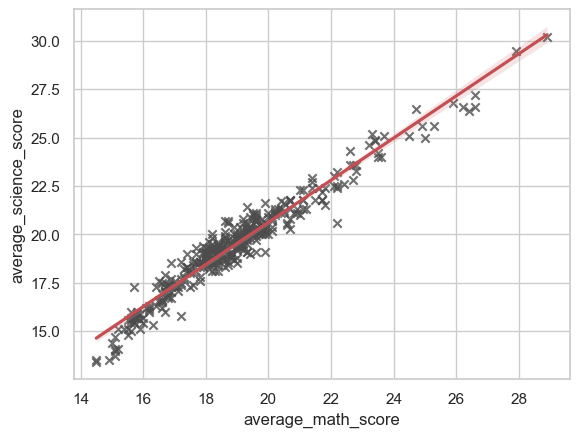

In [208]:
sns.regplot(
    data=All_students, x="average_math_score", y="average_science_score",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)

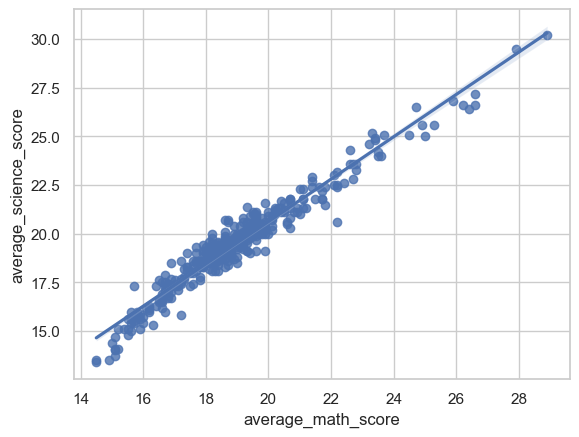

In [211]:
sns.regplot(data=All_students, x="average_math_score", y="average_science_score", robust=True);

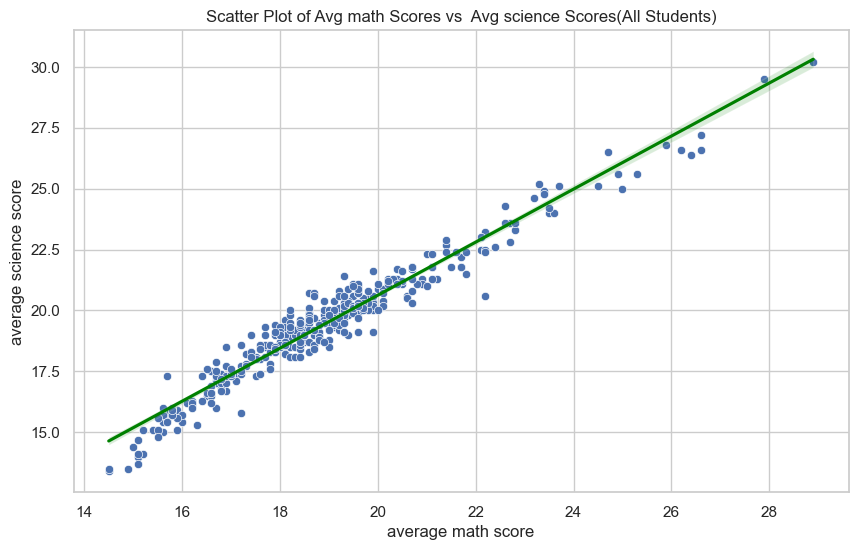

In [210]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=All_students, x='average_math_score', y='average_science_score')
sns.regplot(data=All_students, x='average_math_score', y='average_science_score', scatter=False, color='green')
plt.title('Scatter Plot of Avg math Scores vs  Avg science Scores(All Students)')
plt.xlabel('average math score')
plt.ylabel('average science score');


5.Is there a corelation between scores in all subjects ? do  All Students perform well in math, science,english  also perform well in reading ?


In [73]:
R_20['average_math_score'] = pd.to_numeric(R_20['average_math_score'])

In [74]:
R_20['average_science_score'] = pd.to_numeric(R_20['average_science_score'])

In [75]:
R_20['average_reading_score'] = pd.to_numeric(R_20['average_reading_score'])

In [76]:
R_20['average_english_score'] = pd.to_numeric(R_20['average_english_score'])

In [77]:
All_students.head()

,district_number,district_name,school_number,school_name,subgroup,average_english_score,average_math_score,average_reading_score,average_science_score,average_composite_score,year
0,10,Anderson County,2,Anderson County High School,All Students,19.8,19.4,20.7,20.1,20.1,2020
4,10,Anderson County,25,Clinton High School,All Students,18.3,18.0,19.1,19.1,18.8,2020
9,12,Oak Ridge,35,Oak Ridge High School,All Students,23.0,22.2,24.2,23.2,23.3,2020
14,20,Bedford County,13,Cascade High School,All Students,20.7,19.5,21.3,21.1,20.8,2020
19,20,Bedford County,20,Shelbyville Central High School,All Students,17.3,18.1,18.5,18.5,18.3,2020


In [78]:
All_students = All_students.rename(columns={'average_english_score':'english_avg','average_math_score':'math_avg','average_reading_score':'read_avg','average_science_score':'science_avg'})
All_students.head(1)

,district_number,district_name,school_number,school_name,subgroup,english_avg,math_avg,read_avg,science_avg,average_composite_score,year
0,10,Anderson County,2,Anderson County High School,All Students,19.8,19.4,20.7,20.1,20.1,2020


In [79]:
 A= All_students[['math_avg','english_avg', 'read_avg', 'science_avg']].corr()
A

,math_avg,english_avg,read_avg,science_avg
math_avg,1.000000,0.960438,0.957833,0.972753
english_avg,0.960438,1.000000,0.981548,0.977051
read_avg,0.957833,0.981548,1.000000,0.977305
science_avg,0.972753,0.977051,0.977305,1.000000


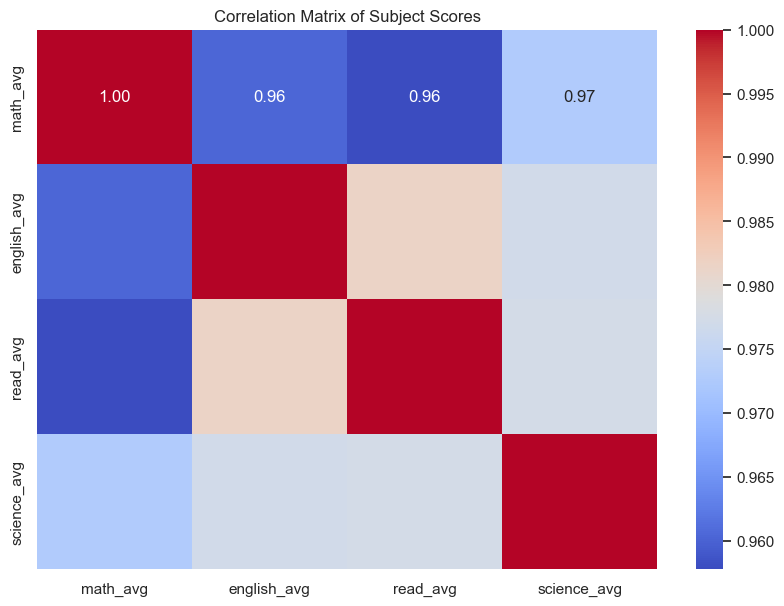

In [80]:
plt.figure(figsize=(10, 7))
sns.heatmap(A, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Subject Scores')
plt.show()

 A_1= All_students[['average_math_score', 'average_science_score', 'average_reading_score', 'average_english_score']].corr().reset_index()
A_1

ax = A_1.plot(kind='bar', x='index', logy=True, rot=30)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Bar Showing scores for All Students' );


In [81]:
 R_20.subgroup.value_counts()

subgroup
All Students                      377
Economically Disadvantaged        374
Students with Disabilities        361
Black/Hispanic/Native American    356
English Learners                  221
Name: count, dtype: int64

4b.Is there a corelation between scores in math & science subjects ? how does each subgroup  perform well in math also perform well in science ?

In [82]:
Economically_Disadvantaged = R_20.loc[R_20.subgroup == 'Economically Disadvantaged']
Economically_Disadvantaged.head(1)

,district_number,district_name,school_number,school_name,subgroup,average_english_score,average_math_score,average_reading_score,average_science_score,average_composite_score,year
2,10,Anderson County,2,Anderson County High School,Economically Disadvantaged,17.5,17.5,19.1,18.5,18.3,2020


In [83]:
 E = Economically_Disadvantaged[['average_english_score','average_math_score',  'average_reading_score', 'average_science_score']].corr().reset_index()
 E 

,index,average_english_score,average_math_score,average_reading_score,average_science_score
0,average_english_score,1.000000,0.907660,0.950696,0.945805
1,average_math_score,0.907660,1.000000,0.910858,0.931889
2,average_reading_score,0.950696,0.910858,1.000000,0.953248
3,average_science_score,0.945805,0.931889,0.953248,1.000000


In [84]:
Economically_Disadvantaged =Economically_Disadvantaged.rename(columns={'average_english_score':'english_avg','average_math_score':'math_avg','average_reading_score':'read_avg','average_science_score':'science_avg'})
Economically_Disadvantaged.head(1)

,district_number,district_name,school_number,school_name,subgroup,english_avg,math_avg,read_avg,science_avg,average_composite_score,year
2,10,Anderson County,2,Anderson County High School,Economically Disadvantaged,17.5,17.5,19.1,18.5,18.3,2020


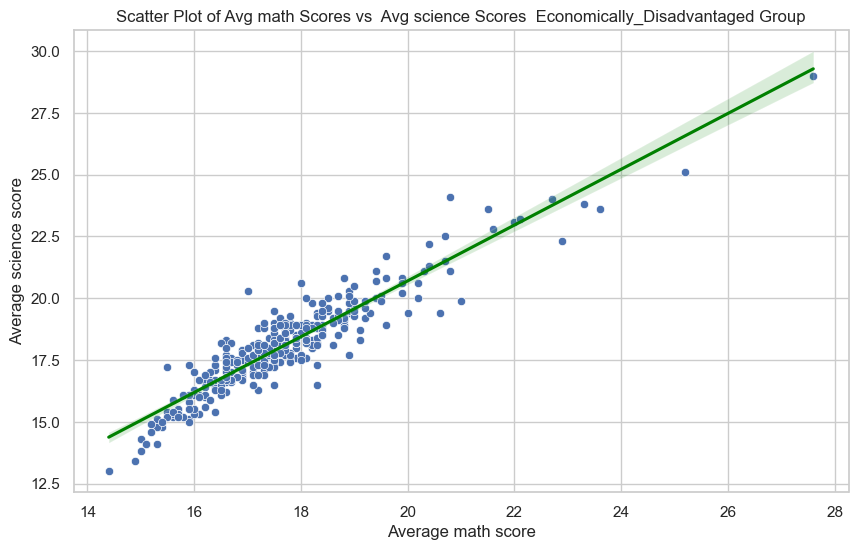

In [197]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Economically_Disadvantaged, x='math_avg', y='science_avg')
sns.regplot(data=Economically_Disadvantaged, x='math_avg', y='science_avg', scatter=False, color='green')
plt.title('Scatter Plot of Avg math Scores vs  Avg science Scores  Economically_Disadvantaged Group')
plt.xlabel('Average math score')
plt.ylabel('Average science score');


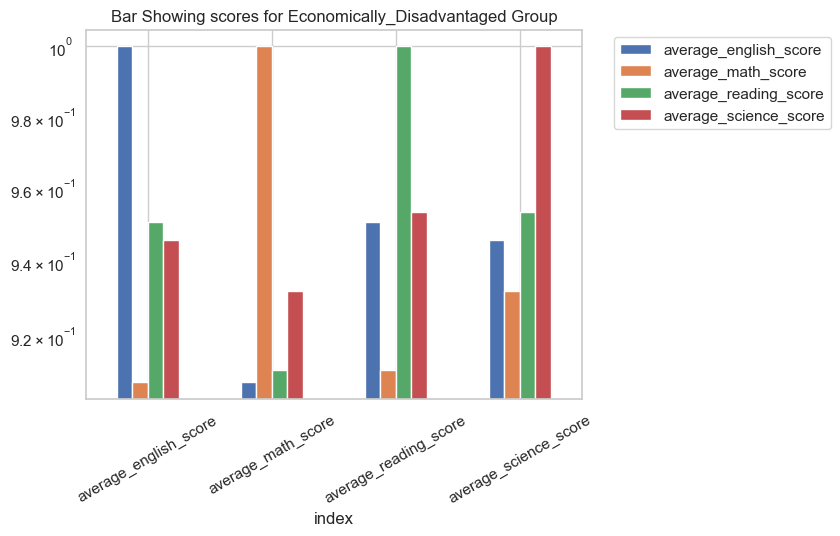

In [86]:
ax = E.plot(kind='bar', x='index', logy=True, rot=30)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Bar Showing scores for Economically_Disadvantaged Group' );

In [87]:
Black_Hispanic_Native_American = R_20.loc[R_20.subgroup == 'Black/Hispanic/Native American']
Black_Hispanic_Native_American.head(1)

,district_number,district_name,school_number,school_name,subgroup,average_english_score,average_math_score,average_reading_score,average_science_score,average_composite_score,year
1,10,Anderson County,2,Anderson County High School,Black/Hispanic/Native American,NaN,NaN,NaN,NaN,NaN,2020


In [88]:
B = Black_Hispanic_Native_American[['average_math_score', 'average_science_score', 'average_reading_score', 'average_english_score']].corr().reset_index()
B

,index,average_math_score,average_science_score,average_reading_score,average_english_score
0,average_math_score,1.000000,0.953911,0.937040,0.943337
1,average_science_score,0.953911,1.000000,0.954561,0.958717
2,average_reading_score,0.937040,0.954561,1.000000,0.962603
3,average_english_score,0.943337,0.958717,0.962603,1.000000


In [89]:
Black_Hispanic_Native_American =Black_Hispanic_Native_American.rename(columns={'average_english_score':'english_avg','average_math_score':'math_avg','average_reading_score':'read_avg','average_science_score':'science_avg'})
Black_Hispanic_Native_American.head(1)

,district_number,district_name,school_number,school_name,subgroup,english_avg,math_avg,read_avg,science_avg,average_composite_score,year
1,10,Anderson County,2,Anderson County High School,Black/Hispanic/Native American,NaN,NaN,NaN,NaN,NaN,2020


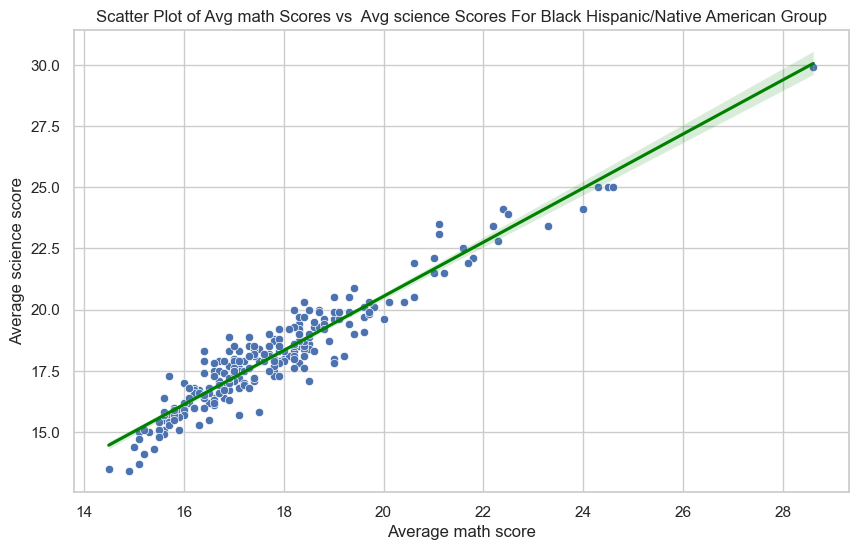

In [198]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Black_Hispanic_Native_American, x='math_avg', y='science_avg')
sns.regplot(data=Black_Hispanic_Native_American, x='math_avg', y='science_avg', scatter=False, color='green')
plt.title('Scatter Plot of Avg math Scores vs  Avg science Scores For Black Hispanic/Native American Group')
plt.xlabel('Average math score')
plt.ylabel('Average science score');


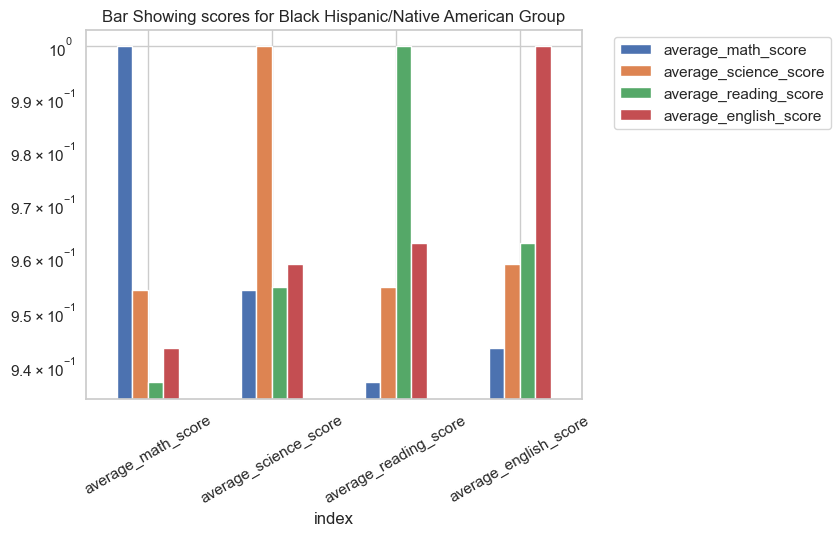

In [91]:
ax = B.plot(kind='bar', x='index', logy=True, rot=30)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Bar Showing scores for Black Hispanic/Native American Group' );


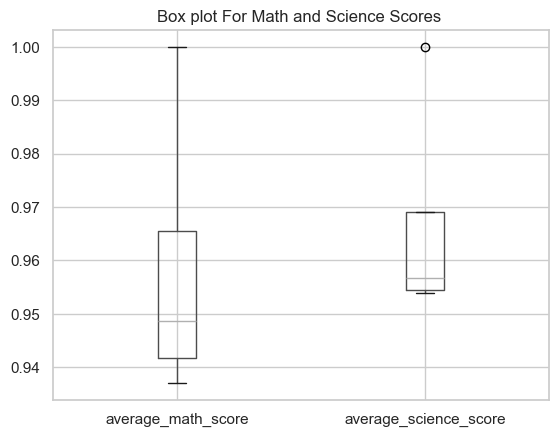

In [92]:
columns_to_plot=['average_math_score','average_science_score']
B[columns_to_plot].boxplot()
plt.title('Box plot For Math and Science Scores ');


In [200]:
English_Learners = R_20.loc[R_20.subgroup == 'English Learners']
English_Learners.head(1)

,district_number,district_name,school_number,school_name,subgroup,average_english_score,average_math_score,average_reading_score,average_science_score,average_composite_score,year
7,10,Anderson County,25,Clinton High School,English Learners,NaN,NaN,NaN,NaN,NaN,2020


In [201]:
EL = English_Learners[['average_math_score', 'average_science_score', 'average_reading_score', 'average_english_score']].corr().reset_index()
EL

,index,average_math_score,average_science_score,average_reading_score,average_english_score
0,average_math_score,1.000000,0.858694,0.696815,0.795356
1,average_science_score,0.858694,1.000000,0.795684,0.863514
2,average_reading_score,0.696815,0.795684,1.000000,0.833352
3,average_english_score,0.795356,0.863514,0.833352,1.000000


In [202]:
 English_Learners = English_Learners.rename(columns={'average_english_score':'english_avg','average_math_score':'math_avg','average_reading_score':'read_avg','average_science_score':'science_avg'})
 English_Learners.head(1)

,district_number,district_name,school_number,school_name,subgroup,english_avg,math_avg,read_avg,science_avg,average_composite_score,year
7,10,Anderson County,25,Clinton High School,English Learners,NaN,NaN,NaN,NaN,NaN,2020


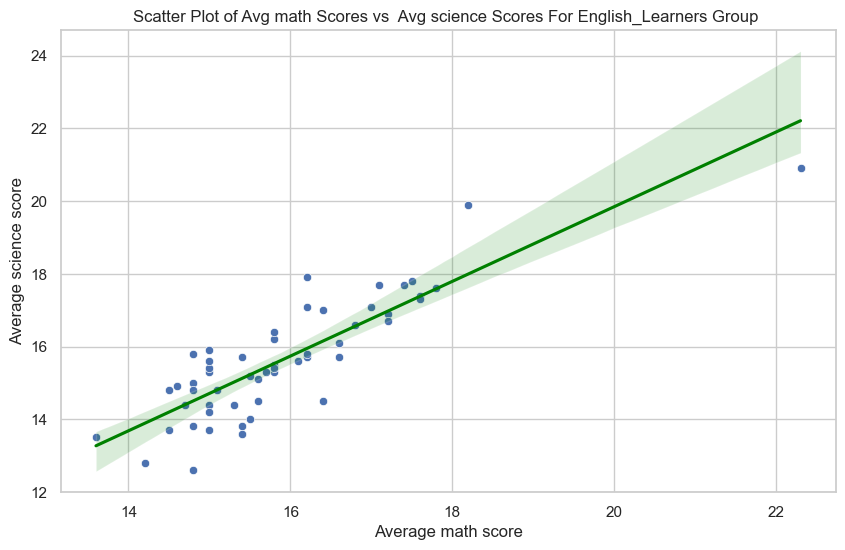

In [203]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=English_Learners, x='math_avg', y='science_avg')
sns.regplot(data=English_Learners, x='math_avg', y='science_avg', scatter=False, color='green')
plt.title('Scatter Plot of Avg math Scores vs  Avg science Scores For English_Learners Group ')
plt.xlabel('Average math score')
plt.ylabel('Average science score');


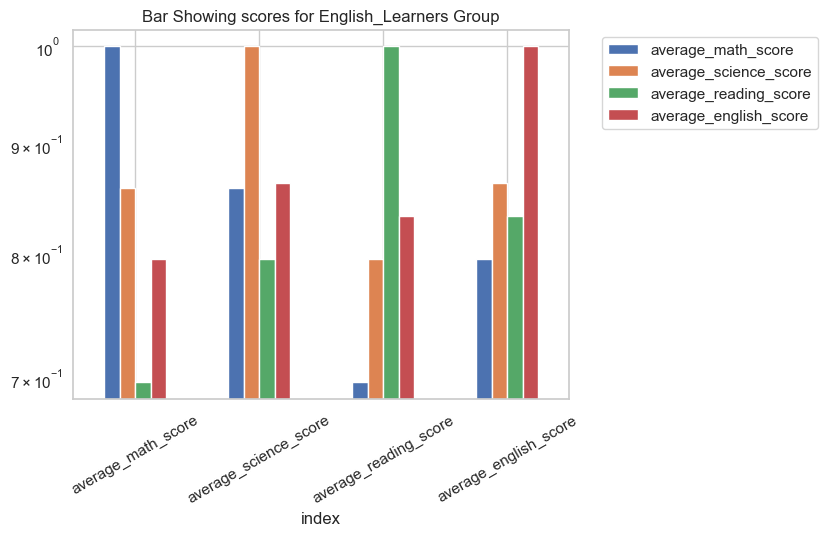

In [97]:
ax = EL.plot(kind='bar', x='index', logy=True, rot=30)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Bar Showing scores for English_Learners Group'  );

In [98]:
Students_with_Disabilities = R_20.loc[R_20.subgroup == 'Students with Disabilities']
Students_with_Disabilities.head(1)

,district_number,district_name,school_number,school_name,subgroup,average_english_score,average_math_score,average_reading_score,average_science_score,average_composite_score,year
3,10,Anderson County,2,Anderson County High School,Students with Disabilities,12.5,15.2,14.4,14.8,14.4,2020


In [99]:
SD = Students_with_Disabilities[['average_math_score', 'average_science_score', 'average_reading_score', 'average_english_score']].corr().reset_index()
SD

,index,average_math_score,average_science_score,average_reading_score,average_english_score
0,average_math_score,1.000000,0.848263,0.845639,0.864874
1,average_science_score,0.848263,1.000000,0.873014,0.863741
2,average_reading_score,0.845639,0.873014,1.000000,0.898745
3,average_english_score,0.864874,0.863741,0.898745,1.000000


In [100]:
Students_with_Disabilities  = Students_with_Disabilities.rename(columns={'average_english_score':'english_avg','average_math_score':'math_avg','average_reading_score':'read_avg','average_science_score':'science_avg'})
Students_with_Disabilities.head(1)

,district_number,district_name,school_number,school_name,subgroup,english_avg,math_avg,read_avg,science_avg,average_composite_score,year
3,10,Anderson County,2,Anderson County High School,Students with Disabilities,12.5,15.2,14.4,14.8,14.4,2020


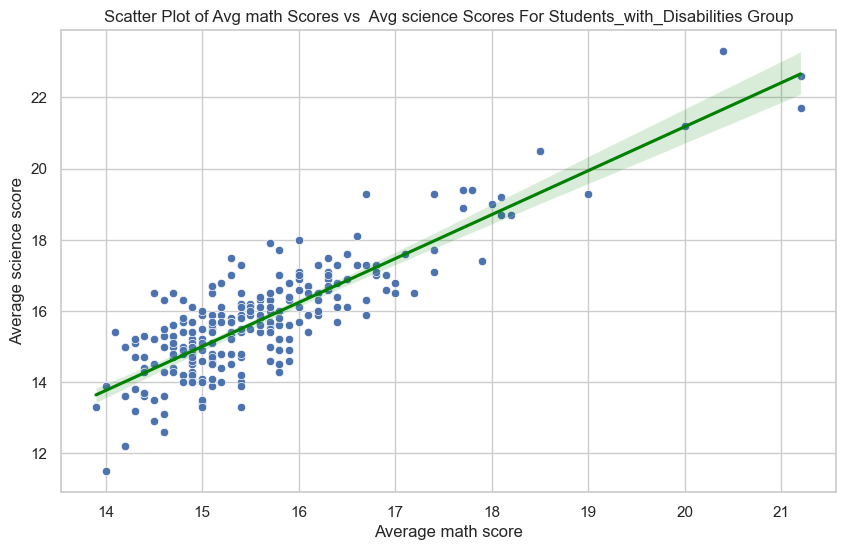

In [204]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Students_with_Disabilities, x='math_avg', y='science_avg')
sns.regplot(data=Students_with_Disabilities, x='math_avg', y='science_avg', scatter=False, color='green')
plt.title('Scatter Plot of Avg math Scores vs  Avg science Scores For Students_with_Disabilities Group')
plt.xlabel('Average math score')
plt.ylabel('Average science score');


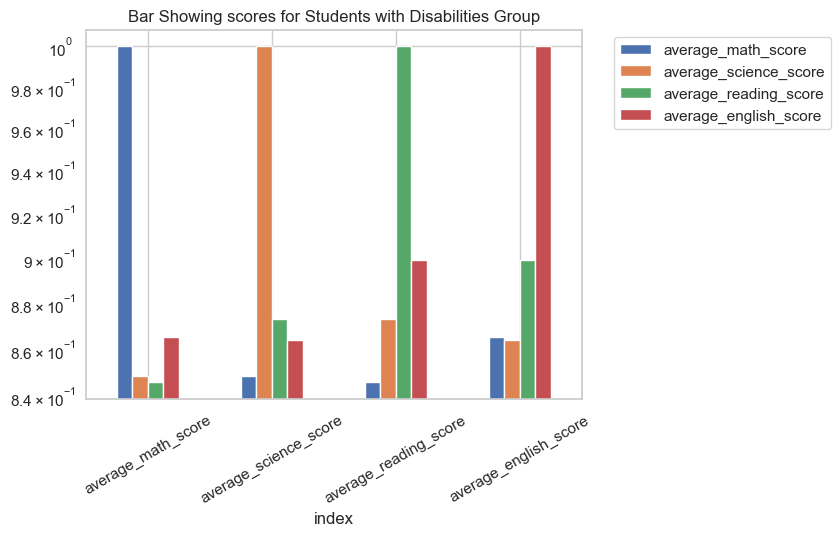

In [102]:
ax = SD.plot(kind='bar', x='index', logy=True, rot=30)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Bar Showing scores for Students with Disabilities Group'  );

In [103]:
R_19 = pd.read_csv('../data/reportcarddata2019.csv')
R_19

,district_number,district_name,school_number,school_name,year,subgroup,english_avg,math_avg,reading_avg,science_avg,...,percent_21_orhigher,percent_met_crb_english,percent_met_crb_math,percent_met_crb_reading,percent_met_crb_science,percent_met_all4_crb,avg_composite_baseline_year,avg_composite_previous,percent_21_orhigher_baseline_year,percent_21_orhigher_previous
0,0,State of Tennessee,0,All Schools,2018,all_students,19.7,19.6,20.7,20.3,...,43.3,57.7,31.6,41.8,32.2,21.4,2017,20.1,2017,42.1
1,0,State of Tennessee,0,All Schools,2018,all_students,19.7,19.6,20.7,20.3,...,43.3,57.7,31.6,41.8,32.2,21.4,2017,20.1,2017,42.1
2,0,State of Tennessee,0,All Schools,2018,bhn,16.7,17.5,18.1,18,...,22.6,37.7,14.8,24,14.8,8,2017,17.6,2017,21.3
3,0,State of Tennessee,0,All Schools,2018,bhn,16.7,17.5,18.1,18,...,22.6,37.7,14.8,24,14.8,8,2017,17.6,2017,21.3
4,0,State of Tennessee,0,All Schools,2018,ed,16.6,17.5,18,18,...,23.1,38,14.7,24.3,15.4,7.7,2017,17.5,2017,21.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11431,986,Tennessee State Board of Education,8015,KIPP Antioch College Prep Elementary,2018,bhn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,2017,NaN
11432,986,Tennessee State Board of Education,8015,KIPP Antioch College Prep Elementary,2018,ed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,2017,NaN
11433,986,Tennessee State Board of Education,8015,KIPP Antioch College Prep Elementary,2018,ell,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,2017,NaN
11434,986,Tennessee State Board of Education,8015,KIPP Antioch College Prep Elementary,2018,super_subgroup,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,2017,NaN


In [104]:
R_19['english_avg'] = R_19['english_avg'].str.replace('*', '', regex=False)

In [105]:
R_19['math_avg'] = R_19['math_avg'].str.replace('*', '', regex=False)

In [106]:
R_19['reading_avg'] = R_19['reading_avg'].str.replace('*', '', regex=False)

In [107]:
R_19['science_avg'] = R_19['science_avg'].str.replace('*', '', regex=False)

In [108]:
R_19['act_composite_avg'] = R_19['act_composite_avg'].str.replace('*', '', regex=False)

In [109]:
R_2019 = R_19.drop(columns=['avg_composite_previous','percent_21_orhigher','percent_met_crb_english',
                            'percent_met_crb_math','percent_met_crb_reading','percent_met_crb_science',
                            'percent_met_all4_crb', 'avg_composite_baseline_year',
                            'percent_21_orhigher_previous','percent_21_orhigher_baseline_year'])

In [110]:
R_2019 .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11436 entries, 0 to 11435
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   district_number    11436 non-null  int64 
 1   district_name      11436 non-null  object
 2   school_number      11436 non-null  int64 
 3   school_name        11436 non-null  object
 4   year               11436 non-null  int64 
 5   subgroup           11436 non-null  object
 6   english_avg        2958 non-null   object
 7   math_avg           2958 non-null   object
 8   reading_avg        2958 non-null   object
 9   science_avg        2958 non-null   object
 10  act_composite_avg  2958 non-null   object
dtypes: int64(3), object(8)
memory usage: 982.9+ KB


In [111]:
R_2019 .columns

Index(['district_number', 'district_name', 'school_number', 'school_name',
       'year', 'subgroup', 'english_avg', 'math_avg', 'reading_avg',
       'science_avg', 'act_composite_avg'],
      dtype='object')

In [112]:
R_2019['math_avg'] = pd.to_numeric(R_2019['math_avg']) 

In [113]:
R_2019['science_avg'] = pd.to_numeric(R_2019['science_avg']) 

In [114]:
R_2019['english_avg'] = pd.to_numeric(R_2019['english_avg'])

In [115]:
R_2019['reading_avg'] = pd.to_numeric(R_2019['reading_avg']) 

In [116]:
all_students = R_2019 .loc[R_2019 .subgroup == 'all_students']
all_students.head(1)

,district_number,district_name,school_number,school_name,year,subgroup,english_avg,math_avg,reading_avg,science_avg,act_composite_avg
0,0,State of Tennessee,0,All Schools,2018,all_students,19.7,19.6,20.7,20.3,20.2


In [117]:
all_students.dtypes

district_number        int64
district_name         object
school_number          int64
school_name           object
year                   int64
subgroup              object
english_avg          float64
math_avg             float64
reading_avg          float64
science_avg          float64
act_composite_avg     object
dtype: object

In [118]:
R_2019['act_composite_avg'] = pd.to_numeric(R_2019['act_composite_avg']) 

In [119]:
A_19 =all_students[['math_avg', 'science_avg']].corr()    
A_19 

,math_avg,science_avg
math_avg,1.000000,0.964392
science_avg,0.964392,1.000000


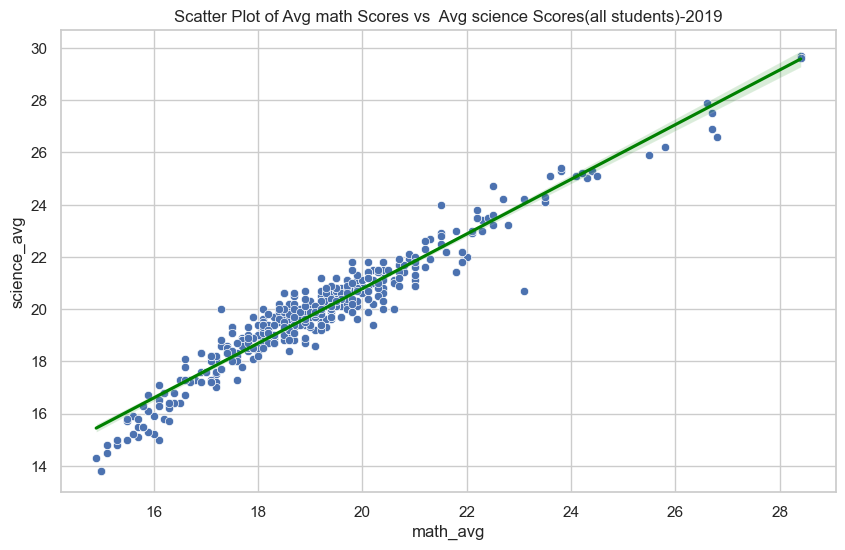

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data= all_students, x='math_avg', y='science_avg')
sns.regplot(data=all_students, x='math_avg', y='science_avg', scatter=False, color='green')
plt.title('Scatter Plot of Avg math Scores vs  Avg science Scores(all students)-2019')
plt.xlabel('math_avg')
plt.ylabel('science_avg');


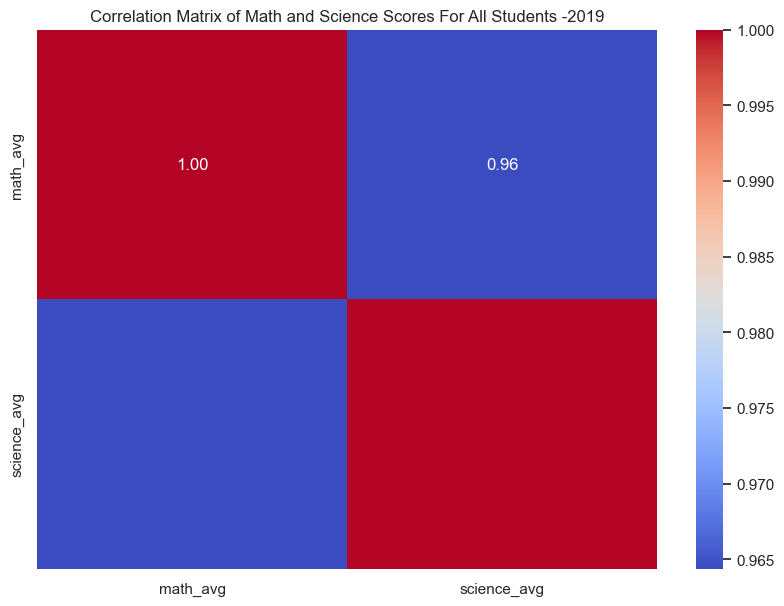

In [121]:
plt.figure(figsize=(10, 7))
sns.heatmap(A_19 , annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Math and Science Scores For All Students -2019')
plt.show()

In [122]:
 Scores_2019 = all_students[['math_avg', 'english_avg', 'reading_avg', 'science_avg']].corr()
Scores_2019

,math_avg,english_avg,reading_avg,science_avg
math_avg,1.000000,0.951039,0.947977,0.964392
english_avg,0.951039,1.000000,0.978300,0.973946
reading_avg,0.947977,0.978300,1.000000,0.978905
science_avg,0.964392,0.973946,0.978905,1.000000


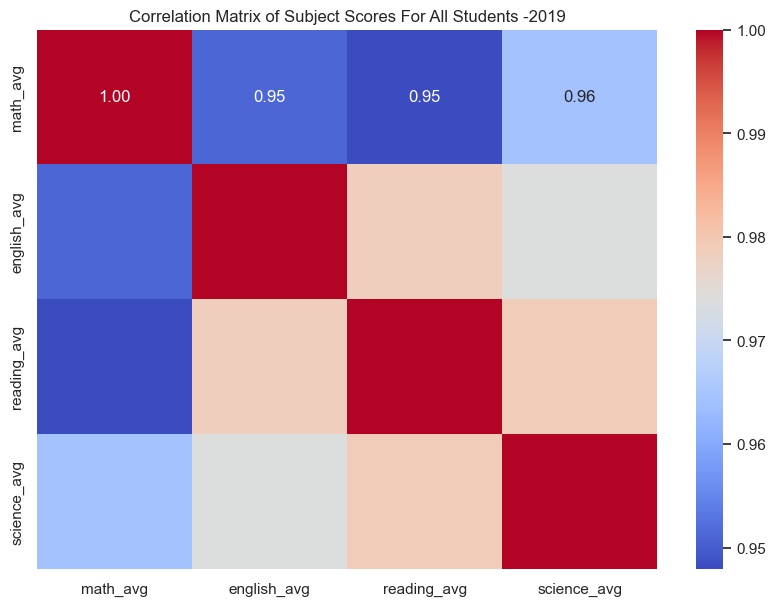

In [123]:
plt.figure(figsize=(10, 7))
sns.heatmap(Scores_2019, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Subject Scores For All Students -2019')
plt.show()

In [124]:
R = pd.read_csv('../data/reportcarddata2018 .csv')
R

,district_number,district_name,school_number,school_name,year,subgroup,english_avg,math_avg,reading_avg,science_avg,...,percent_21_orhigher,percent_met_crb_english,percent_met_crb_math,percent_met_crb_reading,percent_met_crb_science,percent_met_all4_crb,avg_composite_baseline_year,avg_composite_previous,percent_21_orhigher_baseline_year,percent_21_orhigher_previous
0,0,State of Tennessee,0,NaN,2017,All Students,19.5,19.4,20.4,20.3,...,NaN,57.3,30.5,40.6,31,20.1,NaN,NaN,NaN,NaN
1,0,State of Tennessee,0,NaN,2017,Black/Hispanic/Native,16.6,17.3,17.7,18.2,...,NaN,36.9,14,22.1,14.5,7.3,NaN,NaN,NaN,NaN
2,0,State of Tennessee,0,NaN,2017,Economically Disadvantaged,16.4,17.3,17.7,18.1,...,NaN,36.6,13.5,22.7,14.9,7.1,NaN,NaN,NaN,NaN
3,0,State of Tennessee,0,NaN,2017,English Learners,13.7,16.4,15.2,16.6,...,NaN,15.6,9,7.7,7.1,2.9,NaN,NaN,NaN,NaN
4,0,State of Tennessee,0,NaN,2017,Super Subgroup,16.8,17.5,18.0,18.3,...,NaN,39,15.3,24.3,16.4,8.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,986,Tennessee State Board of Education,8005,Bluff City High School,2017,All Students,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9973,986,Tennessee State Board of Education,8005,Bluff City High School,2017,Black/Hispanic/Native,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9974,986,Tennessee State Board of Education,8005,Bluff City High School,2017,Economically Disadvantaged,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9975,986,Tennessee State Board of Education,8005,Bluff City High School,2017,English Learners,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
R_18 = R.drop(columns =['percent_21_orhigher',
       'percent_met_crb_english', 'percent_met_crb_math',
       'percent_met_crb_reading', 'percent_met_crb_science',
       'percent_met_all4_crb', 'avg_composite_baseline_year',
       'avg_composite_previous', 'percent_21_orhigher_baseline_year',
       'percent_21_orhigher_previous'])
R_18.head(2)

,district_number,district_name,school_number,school_name,year,subgroup,english_avg,math_avg,reading_avg,science_avg,act_composite_avg
0,0,State of Tennessee,0,NaN,2017,All Students,19.5,19.4,20.4,20.3,20.1
1,0,State of Tennessee,0,NaN,2017,Black/Hispanic/Native,16.6,17.3,17.7,18.2,17.6


In [126]:
R_18.columns

Index(['district_number', 'district_name', 'school_number', 'school_name',
       'year', 'subgroup', 'english_avg', 'math_avg', 'reading_avg',
       'science_avg', 'act_composite_avg'],
      dtype='object')

In [127]:
R_18.shape

(9977, 11)

In [128]:
R_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district_number    9977 non-null   int64  
 1   district_name      9972 non-null   object 
 2   school_number      9977 non-null   int64  
 3   school_name        9108 non-null   object 
 4   year               9977 non-null   int64  
 5   subgroup           9977 non-null   object 
 6   english_avg        2693 non-null   float64
 7   math_avg           2693 non-null   float64
 8   reading_avg        2693 non-null   float64
 9   science_avg        2693 non-null   float64
 10  act_composite_avg  2952 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 857.5+ KB


In [129]:
R_18['act_composite_avg'] = R_18['act_composite_avg'].str.replace('*', '', regex=False)

In [130]:
R_2018= R_18.dropna(subset=['act_composite_avg'])

In [131]:
R_2018['act_composite_avg'] = pd.to_numeric(R_2019['act_composite_avg']) 

C:\Users\TitanUp\AppData\Local\Temp\ipykernel_33412\2374760834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_2018['act_composite_avg'] = pd.to_numeric(R_2019['act_composite_avg'])


In [132]:
Composite_2018 = R_2018.groupby('school_name')['act_composite_avg'].mean().reset_index(name='Avg composite Score For Schools-2018') 

In [133]:
Composite_scores   = Composite_2018.sort_values('Avg composite Score For Schools-2018',ascending=False).head(7)
Composite_scores  
                                    # Act Above Average Score Range For the Schools(25-36), Top 7 schools with Above Average Score Ranges (25-36)

,school_name,Avg composite Score For Schools-2018
163,Kirby High,30.300
169,Lead Academy,26.000
280,Smyrna High School,24.900
19,Brentwood High School,23.780
296,Stratford STEM Magnet School,23.775
336,Waverly Central High School,22.650
197,Memphis Academy Of Science Engineering Middle...,22.450


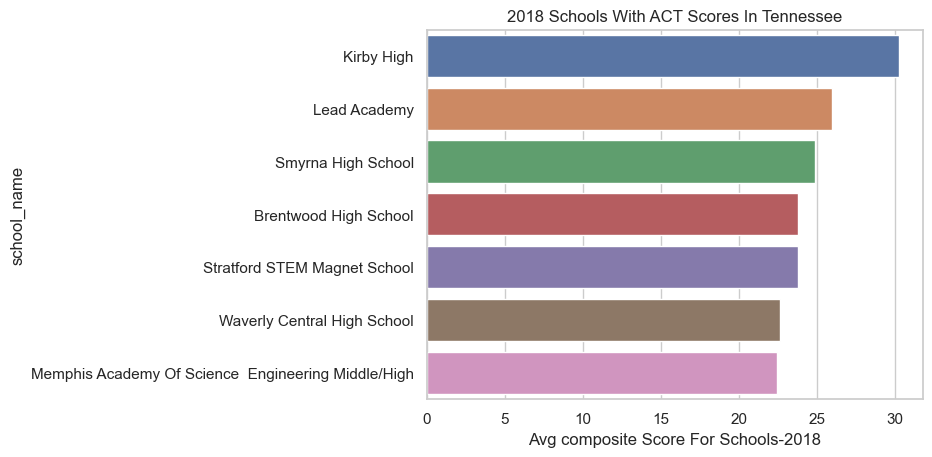

In [134]:
sns.barplot(data = Composite_scores ,  x ='Avg composite Score For Schools-2018', y = 'school_name')
plt.title('2018 Schools With ACT Scores In Tennessee');

In [135]:
R_2018= R_18.dropna(subset=['math_avg'])

In [136]:
R_2018 = R_18.dropna(subset=['science_avg'])

In [137]:
All_students = R_2018.loc[R_18.subgroup == 'All Students']
All_students.head(1)

,district_number,district_name,school_number,school_name,year,subgroup,english_avg,math_avg,reading_avg,science_avg,act_composite_avg
0,0,State of Tennessee,0,NaN,2017,All Students,19.5,19.4,20.4,20.3,20.1


In [138]:
All_students[['math_avg', 'science_avg']].corr()


,math_avg,science_avg
math_avg,1.000000,0.950898
science_avg,0.950898,1.000000


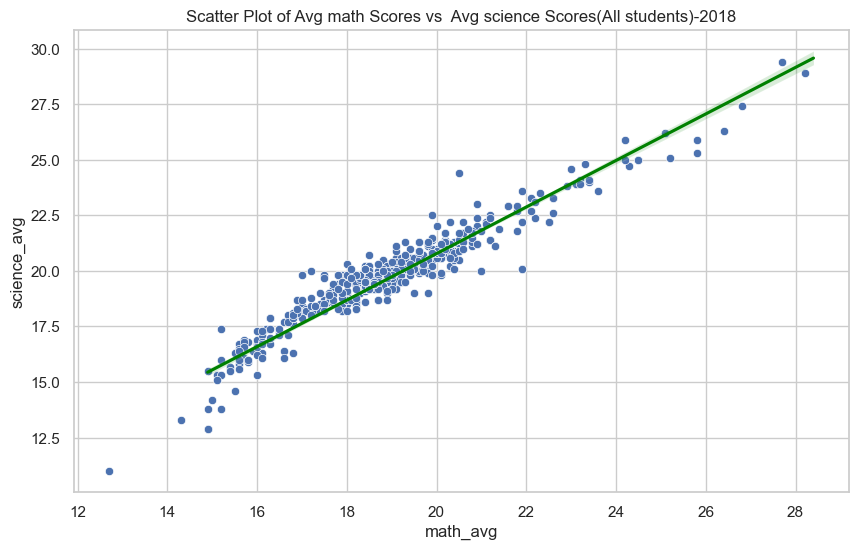

In [139]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data= All_students, x='math_avg', y='science_avg')
sns.regplot(data=all_students, x='math_avg', y='science_avg', scatter=False, color='green')
plt.title('Scatter Plot of Avg math Scores vs  Avg science Scores(All students)-2018')
plt.xlabel('math_avg')
plt.ylabel('science_avg');


In [140]:
A_18 = All_students[['math_avg', 'science_avg']].corr()
A_18



,math_avg,science_avg
math_avg,1.000000,0.950898
science_avg,0.950898,1.000000


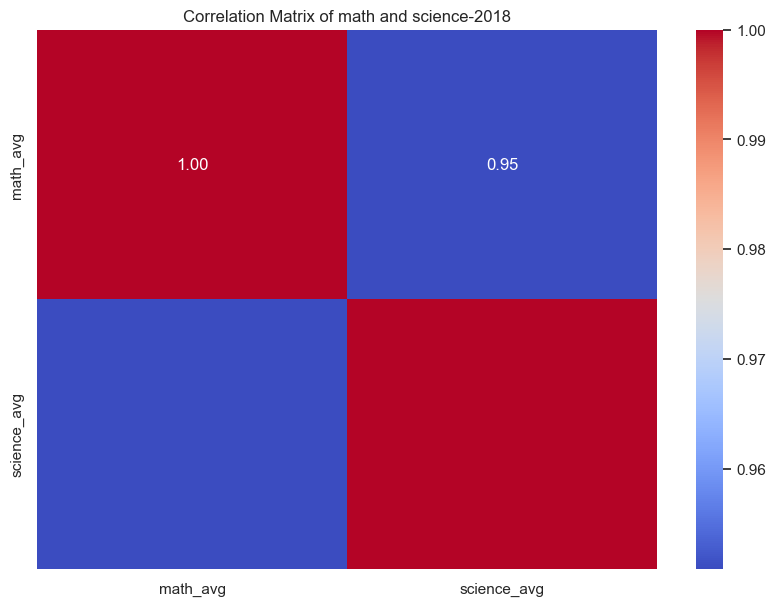

In [141]:
plt.figure(figsize=(10, 7))
sns.heatmap(A_18, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of math and science-2018')
plt.show()

In [142]:
 Scores_2018 = All_students[['math_avg', 'english_avg', 'reading_avg', 'science_avg']].corr()
Scores_2018

,math_avg,english_avg,reading_avg,science_avg
math_avg,1.000000,0.945705,0.923184,0.950898
english_avg,0.945705,1.000000,0.964016,0.964237
reading_avg,0.923184,0.964016,1.000000,0.948925
science_avg,0.950898,0.964237,0.948925,1.000000


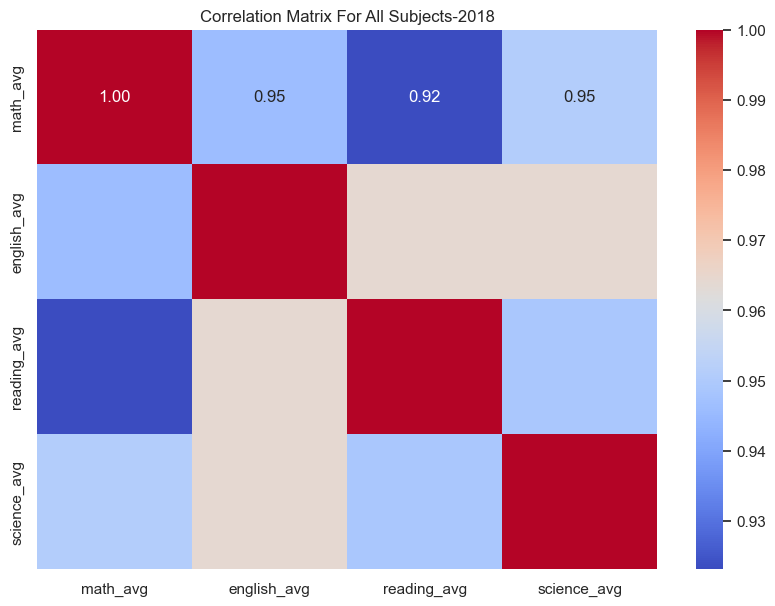

In [143]:
plt.figure(figsize=(10, 7))
sns.heatmap( Scores_2018, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix For All Subjects-2018')
plt.show()

                                                 Tennessee ACT Scores 2020

https://www.piqosity.com/2021/04/23/top-tennessee-high-schools-by-act-scores/

In [144]:
t = pd.read_csv('../data/Tennessee ACT Scores 2020.csv')
t

,School,Avg Score,English,Reading,Math,Science,# Tested
0,Central Magnet School (Rutherford),31.2,32.4,32.6,28.8,30.2,191
1,Merrol Hyde Magnet School,30.4,31.5,32.0,27.8,29.6,53
2,Hume - Fogg High,28.2,28.7,29.8,26.5,27.2,211
3,Brentwood High School,27.6,27.9,28.4,26.6,26.8,426
4,Ravenwood High School,27.4,28.2,27.9,26.5,26.3,352
...,...,...,...,...,...,...,...
357,B. T. Washington High,14.2,12.5,13.9,15.2,14.7,84
358,Sheffield High,14.2,12.6,14.0,15.2,14.7,91
359,Northwest Prep Academy,14.0,12.8,13.7,14.9,14.2,66
360,Morgan County Career and Technical Center,13.2,11.1,13.4,14.4,12.6,30


In [145]:
school_2020=  t.groupby('School')['Avg Score'].mean().reset_index()

In [146]:
ACT_2020 = school_2020.sort_values('Avg Score',ascending=False).head(11) # Top 10 Schools with Avg Act Scpores in 2020
ACT_2020 

,School,Avg Score
38,Central Magnet School (Rutherford),31.2
207,Merrol Hyde Magnet School,30.4
150,Hume - Fogg High,28.2
20,Brentwood High School,27.6
255,Ravenwood High School,27.4
335,University School (Washington),26.7
104,Franklin High School,26.6
170,L N STEM Academy,26.5
192,Martin Luther King Jr School,26.0
187,Madison Academic Magnet High School,25.9


Central Magnet School (31.2)
Merrol Hyde Magnet School (30.4)
Hume-Fogg Magnet High School (28.2)
Brentwood High School (27.6)
Ravenwood High School (27.4)
University School – Washington (26.7)
Franklin High School (26.6)
L N STEM Academy (26.5)
Martin Luther King Jr. School (26.0)
Madison Academic Magnet High School (25.9) & Middle College at Austin Peay SU (25.9)

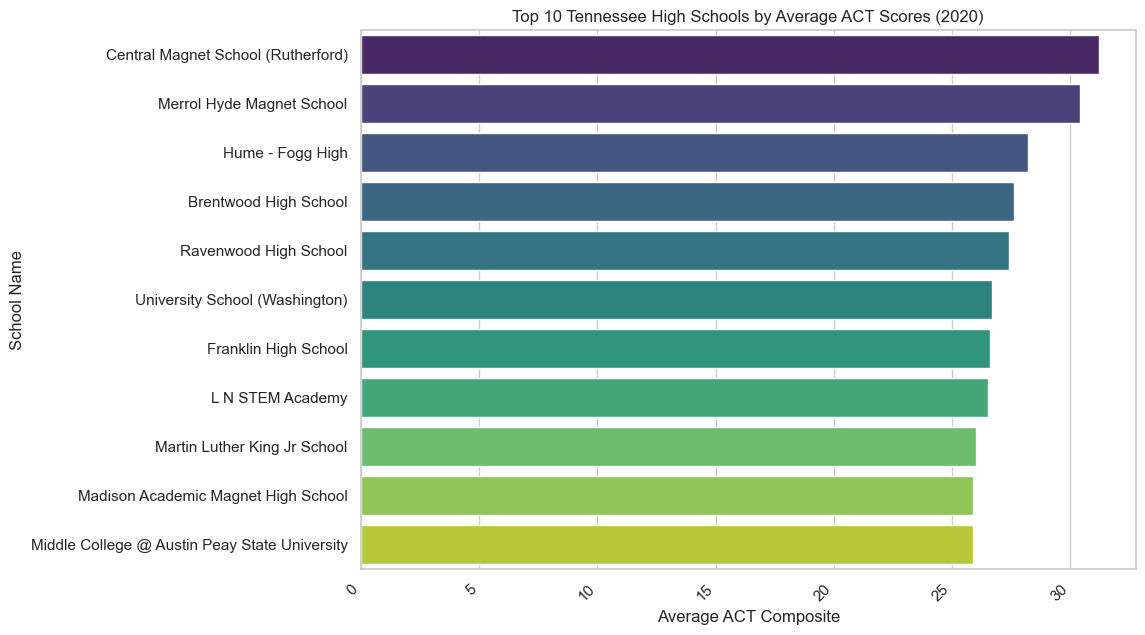

In [147]:
plt.figure(figsize=(10, 7))
sns.barplot(y='School', x='Avg Score', data=ACT_2020,palette='viridis')
plt.ylabel('School Name')
plt.xlabel('Average ACT Composite')
plt.title('Top 10 Tennessee High Schools by Average ACT Scores (2020)')
plt.xticks(rotation=45, ha='right');

In [148]:
t_1 = pd.read_csv('../data/Tennessee ACT Scores 2023.csv')
t_1.head()

,School Name,District Name,Avg Composite,Avg English,Avg Math,Avg Reading,Avg Science,# Tested
0,Central Magnet School,Rutherford County,30.5,31.8,28.3,31.5,29.7,193
1,Merrol Hyde Magnet School,Sumner County,29.8,30.4,27.7,31.8,28.9,55
2,Hume - Fogg High,Davidson County,27.2,27.7,24.9,29.4,26.2,213
3,Middle College @ Austin Peay State University,Montgomery County,27.0,27.4,25.0,28.5,26.5,58
4,Brentwood High School,Williamson County,26.9,27.2,25.7,27.9,25.9,406


In [149]:
school_2023=  t_1.groupby('School Name')['Avg Composite'].mean().reset_index()


In [150]:
ACT_2023 = school_2023.sort_values('Avg Composite',ascending=False).head(11) # Top 10 Schools with Avg Act Scpores in 2023
ACT_2023 

,School Name,Avg Composite
2,Central Magnet School,30.5
16,Merrol Hyde Magnet School,29.8
11,Hume - Fogg High,27.2
17,Middle College @ Austin Peay State University,27.0
0,Brentwood High School,26.9
20,Renaissance High School,26.6
19,Ravenwood High School,26.3
15,Martin Luther King Jr School,26.0
7,Franklin High School,26.0
8,Fred J Page High School,25.3


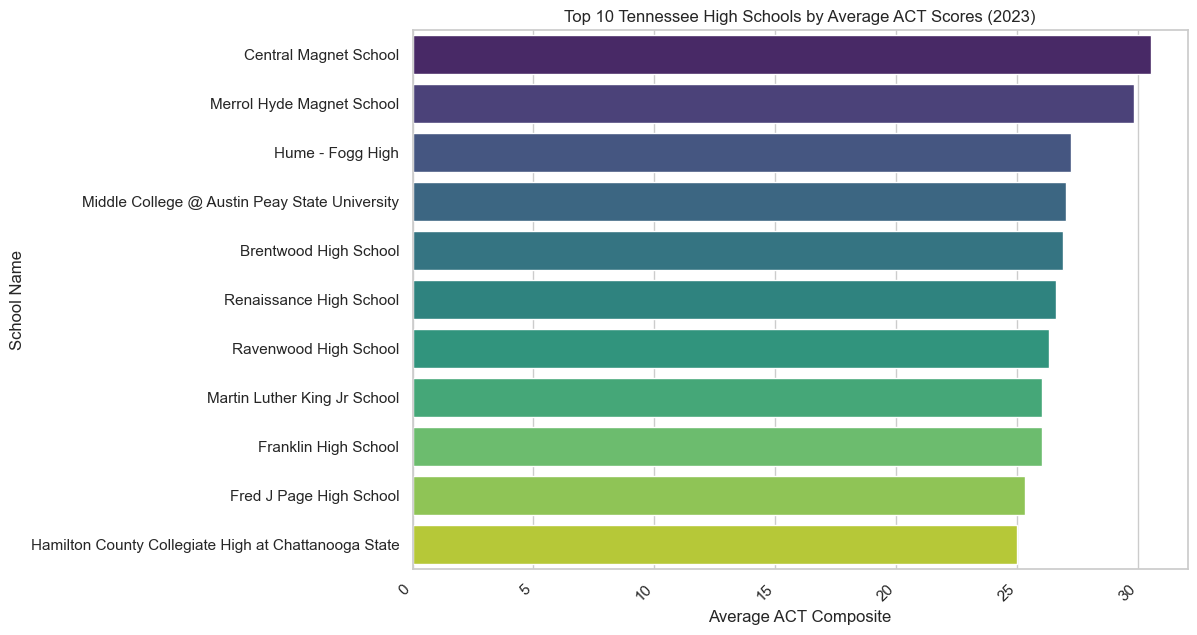

In [151]:
plt.figure(figsize=(10, 7))
sns.barplot(y='School Name', x='Avg Composite', data=ACT_2023, palette='viridis')
plt.ylabel('School Name')
plt.xlabel('Average ACT Composite')
plt.title('Top 10 Tennessee High Schools by Average ACT Scores (2023)')
plt.xticks(rotation=45, ha='right');

https://www.act.org/content/dam/act/unsecured/documents/2020/2020-Average-ACT-Scores-by-State.pdf   

# Its comparing with national percitile(ppt)

#Average ACT Scores by State Graduating Class of 2020

https://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf   # Act 2018

In [152]:
R_20.head(1)

,district_number,district_name,school_number,school_name,subgroup,average_english_score,average_math_score,average_reading_score,average_science_score,average_composite_score,year
0,10,Anderson County,2,Anderson County High School,All Students,19.8,19.4,20.7,20.1,20.1,2020


In [153]:
R_2019.head(1)

,district_number,district_name,school_number,school_name,year,subgroup,english_avg,math_avg,reading_avg,science_avg,act_composite_avg
0,0,State of Tennessee,0,All Schools,2018,all_students,19.7,19.6,20.7,20.3,20.2


In [154]:
R_18.head(1)

,district_number,district_name,school_number,school_name,year,subgroup,english_avg,math_avg,reading_avg,science_avg,act_composite_avg
0,0,State of Tennessee,0,NaN,2017,All Students,19.5,19.4,20.4,20.3,20.1


In [155]:
R_20.average_composite_score.describe()

count    1258.000000
mean       17.697774
std         2.727574
min        12.000000
25%        15.700000
50%        17.600000
75%        19.200000
max        31.000000
Name: average_composite_score, dtype: float64

In [156]:
R_19['act_composite_avg'] = pd.to_numeric(R_19['act_composite_avg'])

In [157]:
R_19.act_composite_avg.describe()

count    2157.000000
mean       17.931201
std         2.430077
min        12.700000
25%        16.400000
50%        17.900000
75%        19.200000
max        31.500000
Name: act_composite_avg, dtype: float64

In [158]:
R_18.act_composite_avg.describe()

count     2952
unique     137
top           
freq       836
Name: act_composite_avg, dtype: object

In [159]:
R_18['act_composite_avg'] = pd.to_numeric(R_18['act_composite_avg'])

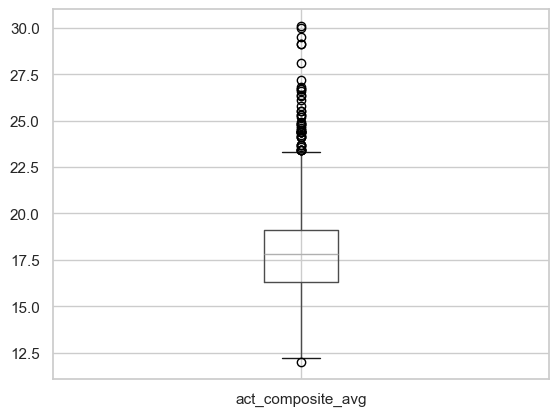

In [160]:
R_18.boxplot('act_composite_avg');

In [161]:
R_2019['act_composite_avg'] = pd.to_numeric(R_2019['act_composite_avg'])

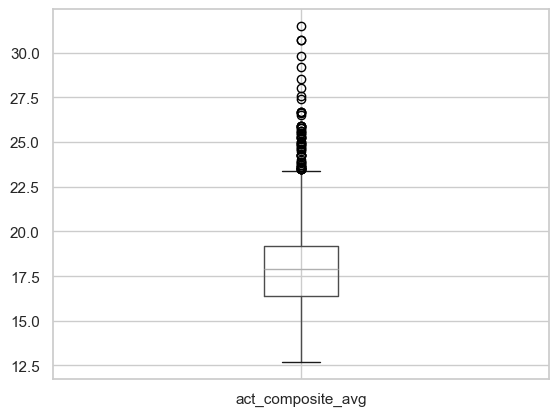

In [162]:
R_2019.boxplot('act_composite_avg');

In [163]:
R_20['average_composite_score'] = pd.to_numeric(R_20['average_composite_score'])

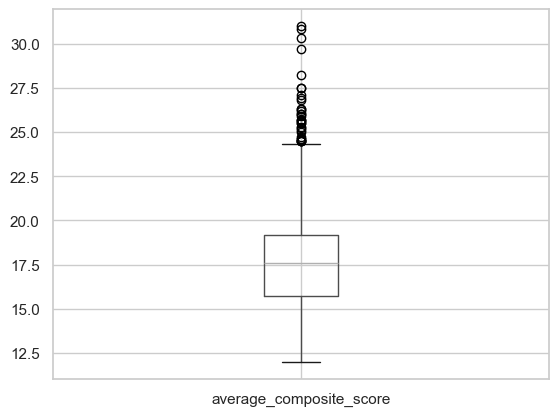

In [164]:
R_20.boxplot('average_composite_score');

In [165]:
Sch = pd.read_csv('../data/schools_with_scores.csv')
Sch

,name,total_students,econ_disadv,score_achievement,score_growth,score_absenteeism,score_grad,score_ready_grad,score_elpa,pct_econ_disadv
0,A. Z. Kelley Elementary,852,261,2.0,2.0,4.0,NaN,NaN,3.0,30.633803
1,Alex Green Elementary,234,153,2.0,2.0,4.0,NaN,NaN,2.0,65.384615
2,Amqui Elementary,458,246,2.0,4.0,4.0,NaN,NaN,4.0,53.711790
3,Andrew Jackson Elementary,496,122,3.0,4.0,4.0,NaN,NaN,2.0,24.596774
4,Antioch High School,1915,622,1.0,0.0,4.0,2.0,3.0,0.0,32.480418
...,...,...,...,...,...,...,...,...,...,...
130,Waverly-Belmont Elementary School,494,107,4.0,2.0,4.0,NaN,NaN,NaN,21.659919
131,West End Middle,503,112,3.0,0.0,2.0,NaN,NaN,NaN,22.266402
132,Westmeade Elementary,422,132,3.0,4.0,4.0,NaN,NaN,3.0,31.279621
133,William Henry Oliver Middle,985,252,2.0,0.0,4.0,NaN,NaN,2.0,25.583756


In [166]:
Sch.columns

Index(['name', 'total_students', 'econ_disadv', 'score_achievement',
       'score_growth', 'score_absenteeism', 'score_grad', 'score_ready_grad',
       'score_elpa', 'pct_econ_disadv'],
      dtype='object')

In [167]:
S = Sch.drop(columns= ['score_growth', 'score_absenteeism', 'score_grad', 'score_ready_grad',
       'score_elpa'])
S 

,name,total_students,econ_disadv,score_achievement,pct_econ_disadv
0,A. Z. Kelley Elementary,852,261,2.0,30.633803
1,Alex Green Elementary,234,153,2.0,65.384615
2,Amqui Elementary,458,246,2.0,53.711790
3,Andrew Jackson Elementary,496,122,3.0,24.596774
4,Antioch High School,1915,622,1.0,32.480418
...,...,...,...,...,...
130,Waverly-Belmont Elementary School,494,107,4.0,21.659919
131,West End Middle,503,112,3.0,22.266402
132,Westmeade Elementary,422,132,3.0,31.279621
133,William Henry Oliver Middle,985,252,2.0,25.583756


                                          What is the distribution of scores across different schools?

In [168]:
Sch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               135 non-null    object 
 1   total_students     135 non-null    int64  
 2   econ_disadv        135 non-null    int64  
 3   score_achievement  131 non-null    float64
 4   score_growth       132 non-null    float64
 5   score_absenteeism  134 non-null    float64
 6   score_grad         18 non-null     float64
 7   score_ready_grad   17 non-null     float64
 8   score_elpa         98 non-null     float64
 9   pct_econ_disadv    135 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 10.7+ KB


In [169]:
S['score_achievement'].head()

0    2.0
1    2.0
2    2.0
3    3.0
4    1.0
Name: score_achievement, dtype: float64

In [170]:
S['score_achievement'].unique()

array([ 2.,  3.,  1.,  0.,  4., nan])

In [171]:
S.dropna(subset=['name'])

,name,total_students,econ_disadv,score_achievement,pct_econ_disadv
0,A. Z. Kelley Elementary,852,261,2.0,30.633803
1,Alex Green Elementary,234,153,2.0,65.384615
2,Amqui Elementary,458,246,2.0,53.711790
3,Andrew Jackson Elementary,496,122,3.0,24.596774
4,Antioch High School,1915,622,1.0,32.480418
...,...,...,...,...,...
130,Waverly-Belmont Elementary School,494,107,4.0,21.659919
131,West End Middle,503,112,3.0,22.266402
132,Westmeade Elementary,422,132,3.0,31.279621
133,William Henry Oliver Middle,985,252,2.0,25.583756


In [172]:
S.dropna(subset=['score_achievement'])

,name,total_students,econ_disadv,score_achievement,pct_econ_disadv
0,A. Z. Kelley Elementary,852,261,2.0,30.633803
1,Alex Green Elementary,234,153,2.0,65.384615
2,Amqui Elementary,458,246,2.0,53.711790
3,Andrew Jackson Elementary,496,122,3.0,24.596774
4,Antioch High School,1915,622,1.0,32.480418
...,...,...,...,...,...
130,Waverly-Belmont Elementary School,494,107,4.0,21.659919
131,West End Middle,503,112,3.0,22.266402
132,Westmeade Elementary,422,132,3.0,31.279621
133,William Henry Oliver Middle,985,252,2.0,25.583756


In [173]:
S.dtypes

name                  object
total_students         int64
econ_disadv            int64
score_achievement    float64
pct_econ_disadv      float64
dtype: object

In [174]:
S['score_achievement'] = pd.to_numeric(S['score_achievement'])

In [175]:
S.groupby('name')['score_achievement'].describe().reset_index()  #grouping Scores by schools

,name,count,mean,std,min,25%,50%,75%,max
0,A. Z. Kelley Elementary,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0
1,Alex Green Elementary,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0
2,Amqui Elementary,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0
3,Andrew Jackson Elementary,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
4,Antioch High School,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
130,Waverly-Belmont Elementary School,1.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0
131,West End Middle,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
132,Westmeade Elementary,1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
133,William Henry Oliver Middle,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0


In [176]:
S['score_achievement'].describe()

count    131.000000
mean       2.106870
std        1.178342
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: score_achievement, dtype: float64

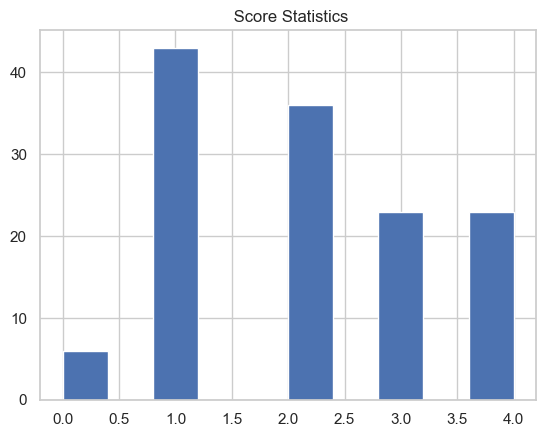

In [177]:
S['score_achievement'].hist()
plt.title(' Score Statistics');

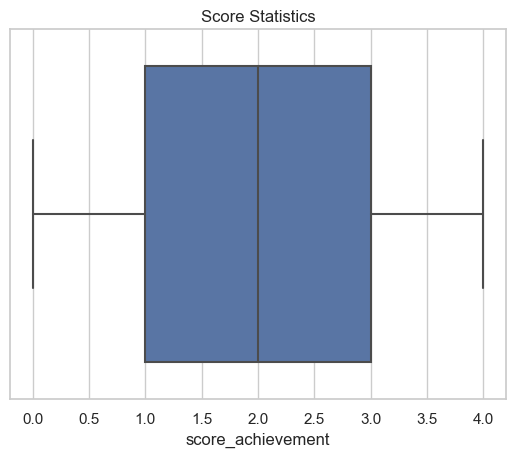

In [178]:
sns.boxplot(x='score_achievement', data=S)
plt.title('Score Statistics');

 Sore-achievement :Performance Level: It might indicate the performance level or rating of a school based on student scores. For example, it could categorize schools into different tiers (e.g., "High Achievement," "Average Achievement," "Low Achievement") based on their scores.

How many schools are there in the dataset?

In [179]:
S['name'].nunique()

135

What is the range of scores in the dataset

0 & 4 Are min & max scores

In [180]:
missing_values = S.isnull().sum()
missing_values

name                 0
total_students       0
econ_disadv          0
score_achievement    4
pct_econ_disadv      0
dtype: int64

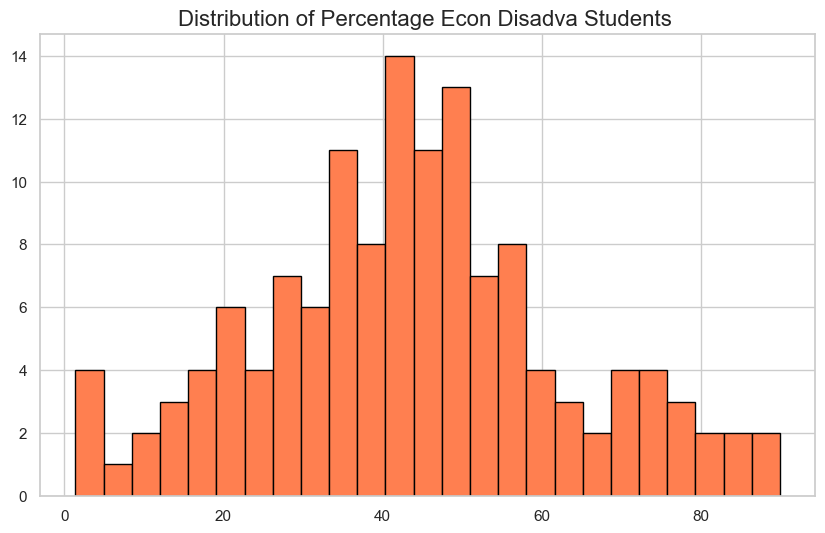

In [181]:
S['pct_econ_disadv'].hist(bins = 25, color = 'coral', edgecolor = 'black', figsize = (10,6))

plt.title('Distribution of Percentage Econ Disadva Students ', fontsize = 16);

https://www.piqosity.com/top-tennessee-high-schools-by-act-scores-2023/

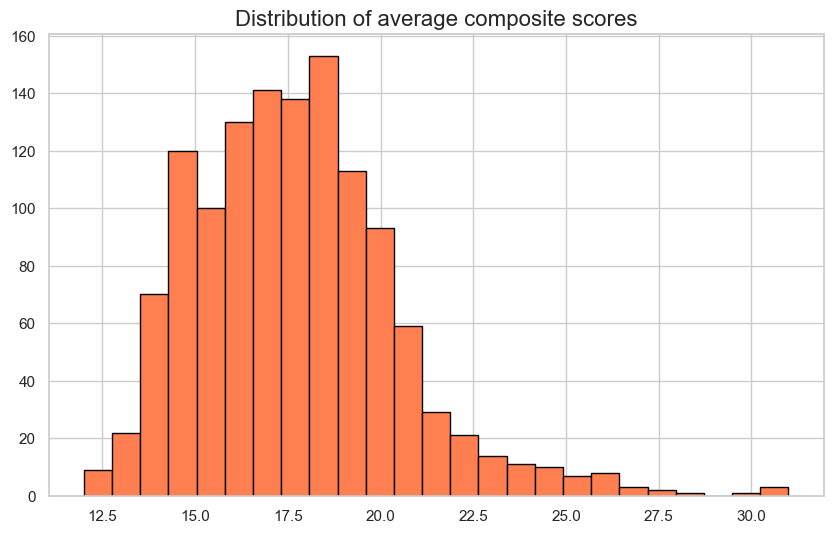

In [182]:
R_20['average_composite_score'].hist(bins = 25, color = 'coral', edgecolor = 'black', figsize = (10,6))

plt.title('Distribution of average composite scores', fontsize = 16);

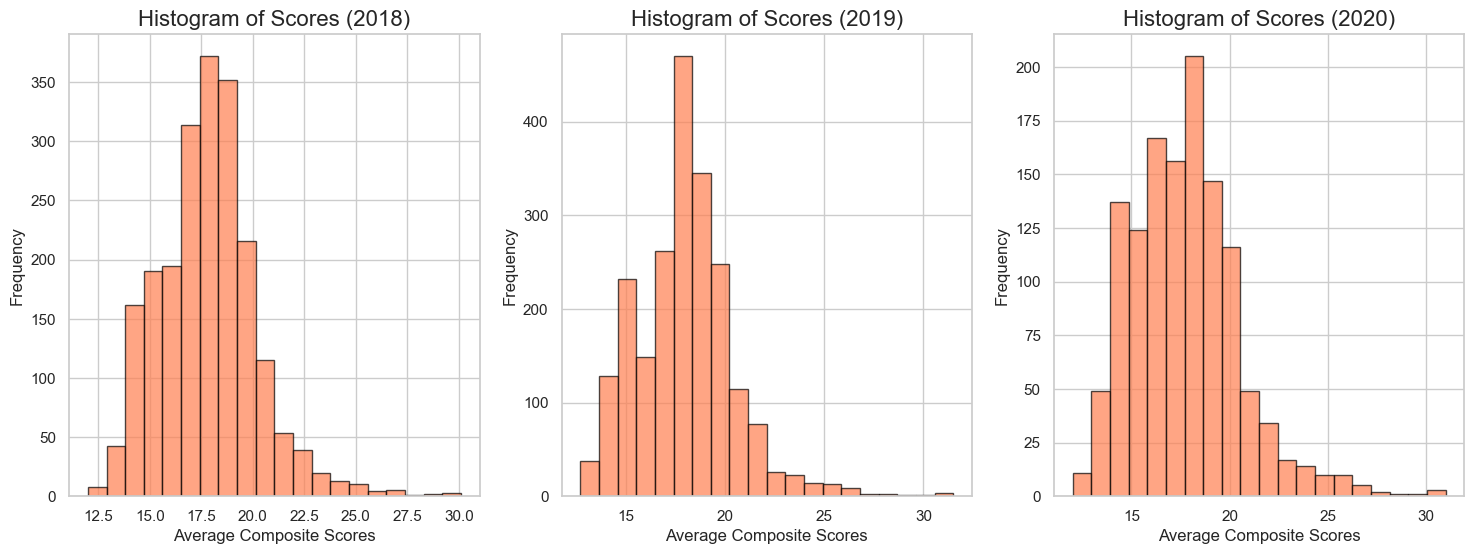

In [183]:
plt.figure(figsize=(18, 6))
# Histogram for 2018
plt.subplot(1, 3, 1)
plt.hist(R_18['act_composite_avg'], bins=20,color='coral', edgecolor='black', alpha=0.7)
plt.title('Histogram of Scores (2018)',fontsize = 16)
plt.xlabel('Average Composite Scores')
plt.ylabel('Frequency')

# Histogram for 2019
plt.subplot(1, 3, 2)
plt.hist(R_2019['act_composite_avg'], bins=20, color='coral', edgecolor='black', alpha=0.7)
plt.title('Histogram of Scores (2019)',fontsize = 16)
plt.xlabel('Average Composite Scores')
plt.ylabel('Frequency')

# Histogram for 2020
plt.subplot(1, 3, 3)
plt.hist(R_20['average_composite_score'], bins=20,color='coral', edgecolor='black', alpha=0.7)
plt.title('Histogram of Scores (2020)',fontsize = 16)
plt.xlabel('Average Composite Scores')
plt.ylabel('Frequency');


In [184]:
R_20.dtypes

district_number              int64
district_name               object
school_number                int64
school_name                 object
subgroup                    object
average_english_score      float64
average_math_score         float64
average_reading_score      float64
average_science_score      float64
average_composite_score    float64
year                         int64
dtype: object

In [185]:
R_20['average_math_score'] = pd.to_numeric(R_20['average_math_score'])

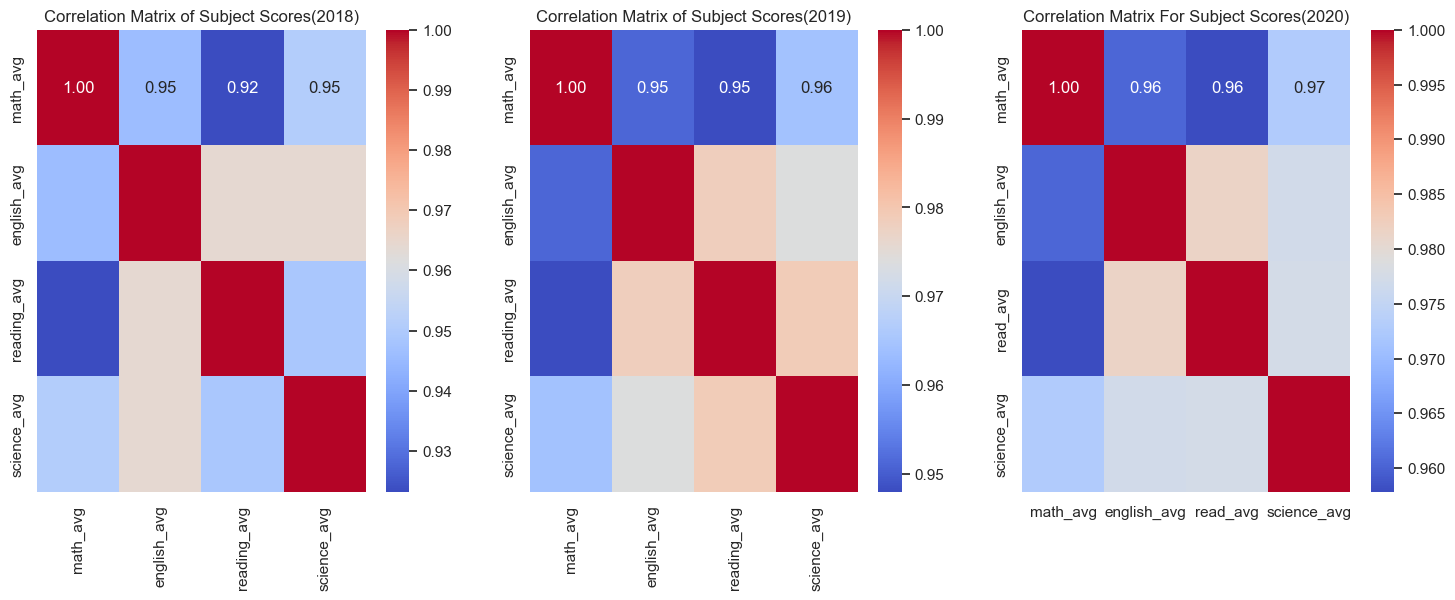

In [186]:
plt.figure(figsize=(18, 6))

# Heatmap for 2018
plt.subplot(1, 3, 1)
sns.heatmap(Scores_2018, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Subject Scores(2018)')

# Heatmap for 2019
plt.subplot(1, 3, 2)
sns.heatmap(Scores_2019, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Subject Scores(2019)')

# Heatmap for 2020
plt.subplot(1, 3, 3)
sns.heatmap(A, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix For Subject Scores(2020)');



In [187]:
subject_sta = R_2019[['english_avg','math_avg','reading_avg','science_avg']].describe()
subject_sta

,english_avg,math_avg,reading_avg,science_avg
count,2157.000000,2157.000000,2157.000000,2157.000000
mean,16.882754,17.742049,18.225406,18.263700
std,3.055507,1.892601,2.708986,2.227821
min,9.300000,14.300000,11.000000,12.900000
25%,14.800000,16.400000,16.500000,16.800000
50%,17.000000,17.600000,18.300000,18.300000
75%,18.700000,18.700000,19.700000,19.500000
max,32.200000,28.400000,33.000000,31.500000


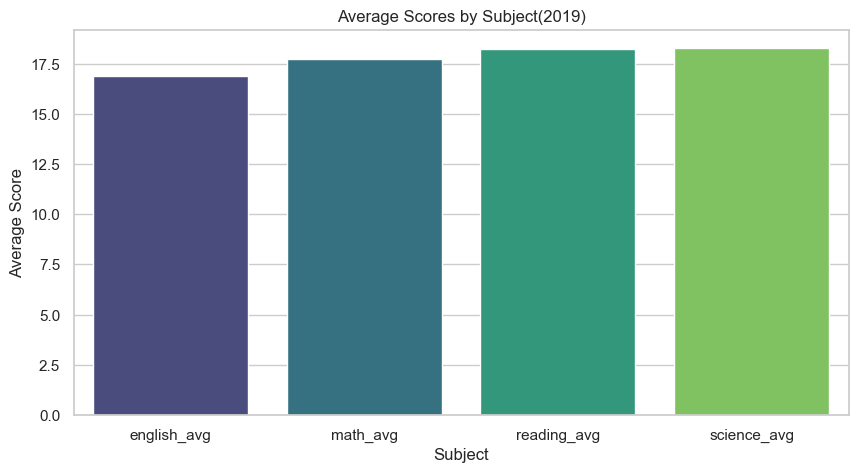

In [188]:
plt.figure(figsize=(10, 5))
sns.barplot(x=subject_sta.columns, y=subject_sta.loc['mean'], palette='viridis')
plt.title('Average Scores by Subject(2019)')
plt.xlabel('Subject')
plt.ylabel('Average Score');

In [189]:
subject_stat = R_18[['english_avg',	'math_avg',	'reading_avg',	'science_avg']].describe()
subject_stat

,english_avg,math_avg,reading_avg,science_avg
count,2693.000000,2693.000000,2693.000000,2693.000000
mean,16.515782,17.516599,17.793910,18.156257
std,3.334120,2.218406,3.168092,2.483822
min,8.000000,10.000000,8.000000,10.000000
25%,14.200000,16.000000,15.700000,16.500000
50%,16.500000,17.300000,17.700000,18.200000
75%,18.300000,18.600000,19.500000,19.500000
max,34.000000,32.000000,34.700000,35.000000


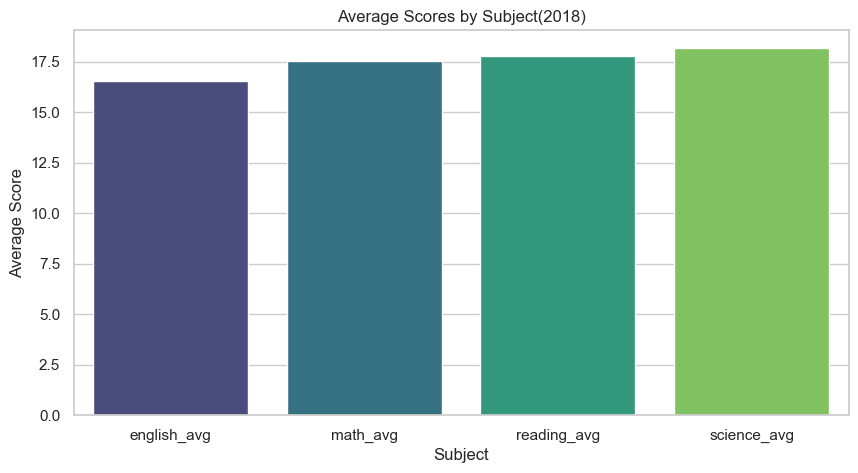

In [190]:
plt.figure(figsize=(10, 5))
sns.barplot(x=subject_stat.columns, y=subject_stat.loc['mean'], palette='viridis')
plt.title('Average Scores by Subject(2018)')
plt.xlabel('Subject')
plt.ylabel('Average Score');